In [80]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignora i FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Il tuo codice qui

# Ripristina le impostazioni di avvertimento predefinite
#warnings.resetwarnings()

In [105]:
path_train = 'C:\\Users\\Alexandru.Dediu\\Documents\\Data-Challenge-PHM-Asia-Pacific-2023\\dataset\\train'
path_data = "\\data"
path_labels = "\\labels.xlsx"


# create data df
frames = []
count = 0

def makePlot(df):
    plt.figure(figsize=(10, 6))
    for colonna in df.columns:
        if colonna != "TIME":
            plt.plot(df.index, df[colonna], label=colonna)

    plt.xlabel('Tempo')
    plt.ylabel('Pressione')
    plt.title('Plot di P1-P7 nel tempo')

    plt.legend()
    plt.show()

for filename in os.listdir(path_train+path_data):
    if filename.endswith('.csv'):
       
        percorso_file = os.path.join(path_train+path_data, filename)
        df = pd.read_csv(percorso_file)
    
            
        count=count+1
       
        frames.append(df)

df_data = pd.concat(frames, ignore_index=True)




df_data



TIME        P1        P2        P3        P4        P5        P6  \
0       0.000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
1       0.001  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
2       0.002  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
3       0.003  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
4       0.004  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
...       ...       ...       ...       ...       ...       ...       ...   
212572  1.196  1.948734  1.912482  1.904362  1.835654  1.924899  1.857220   
212573  1.197  1.948823  1.899824  1.884360  1.825497  1.927513  1.846068   
212574  1.198  1.957784  1.911383  1.893740  1.859805  1.940953  1.861668   
212575  1.199  1.970451  1.950009  1.945417  1.913911  1.953648  1.835381   
212576  1.200  1.988895  1.997232  2.003571  1.989339  1.981822  1.888756   

              P7  
0       2.000000  
1       2.000000  
2       2.000000  
3       2.000000  
4       2.000000  
...          ...  
212572  1.920020  
212573  1.919081  
212574  1.950562  
212575  1.983321  
212576  1.985784  

[212577 rows x 8 columns]

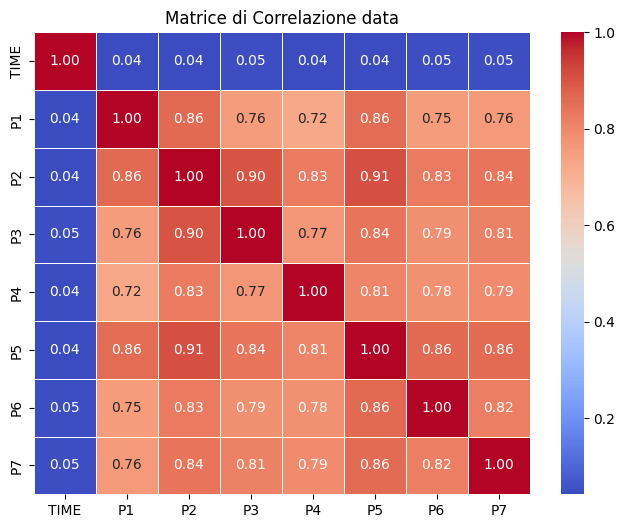

In [61]:
# Calcola la matrice di correlazione
correlation_matrix = df_data.corr()

# Crea una heatmap utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione data')
plt.show()

In [62]:

# create labels df
df_labels = pd.read_excel(path_train + path_labels, header=[0, 1])
df_labels.columns = df_labels.columns.droplevel(0)
df_labels = df_labels.rename(columns={"Unnamed: 0_level_1" : "Case","Unnamed: 1_level_1":"Spacecraft","Unnamed: 2_level_1":"Condition"})
df_labels = df_labels.set_index("Case")
df_labels


Spacecraft Condition  SV1  SV2  SV3  SV4 BP1 BP2 BP3  BP4  BP5  BP6  \
Case                                                                        
1              1    Normal  100  100  100  100  No  No  No   No   No   No   
2              1    Normal  100  100  100  100  No  No  No   No   No   No   
3              1    Normal  100  100  100  100  No  No  No   No   No   No   
4              1    Normal  100  100  100  100  No  No  No   No   No   No   
5              1    Normal  100  100  100  100  No  No  No   No   No   No   
...          ...       ...  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...   
173            3   Anomaly  100  100  100  100  No  No  No  Yes   No   No   
174            3   Anomaly  100  100  100  100  No  No  No   No  Yes   No   
175            3   Anomaly  100  100  100  100  No  No  No   No   No  Yes   
176            3   Anomaly  100  100  100  100  No  No  No   No   No   No   
177            3   Anomaly  100  100  100  100  No  No  No   No   No   No   

      BP7  BV1  
Case            
1      No   No  
2      No   No  
3      No   No  
4      No   No  
5      No   No  
...   ...  ...  
173    No   No  
174    No   No  
175    No   No  
176   Yes   No  
177    No  Yes  

[177 rows x 14 columns]

Text(0.5, 1.0, 'Matrice di Correlazione labels')

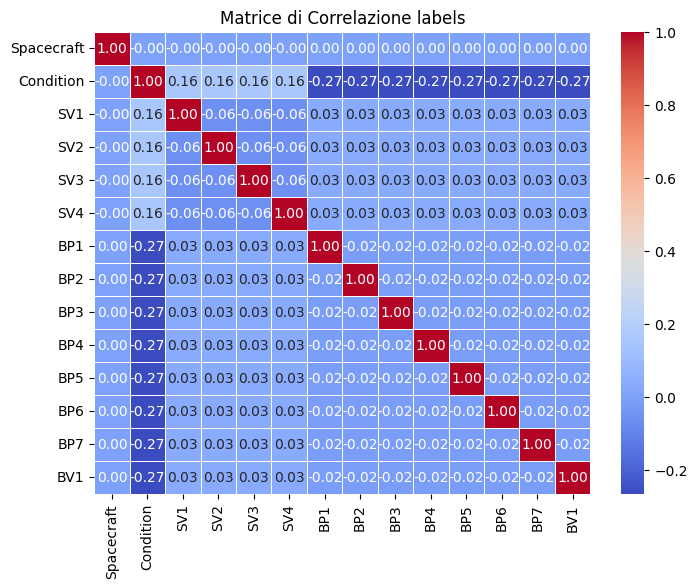

In [64]:
from sklearn.preprocessing import LabelEncoder

# Copia il DataFrame originale
df_labels_encoded = df_labels.copy()

# Codifica tutte le colonne categoriche in numeri
label_encoder = LabelEncoder()
for col in df_labels.columns:
    if df_labels[col].dtype == 'object':
        df_labels_encoded[col] = label_encoder.fit_transform(df_labels[col])

# Calcola la matrice di correlazione
correlation_matrix = df_labels_encoded.corr()

# Crea una heatmap utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione labels')
#plt.show()

<Figure size 1500x1000 with 0 Axes>

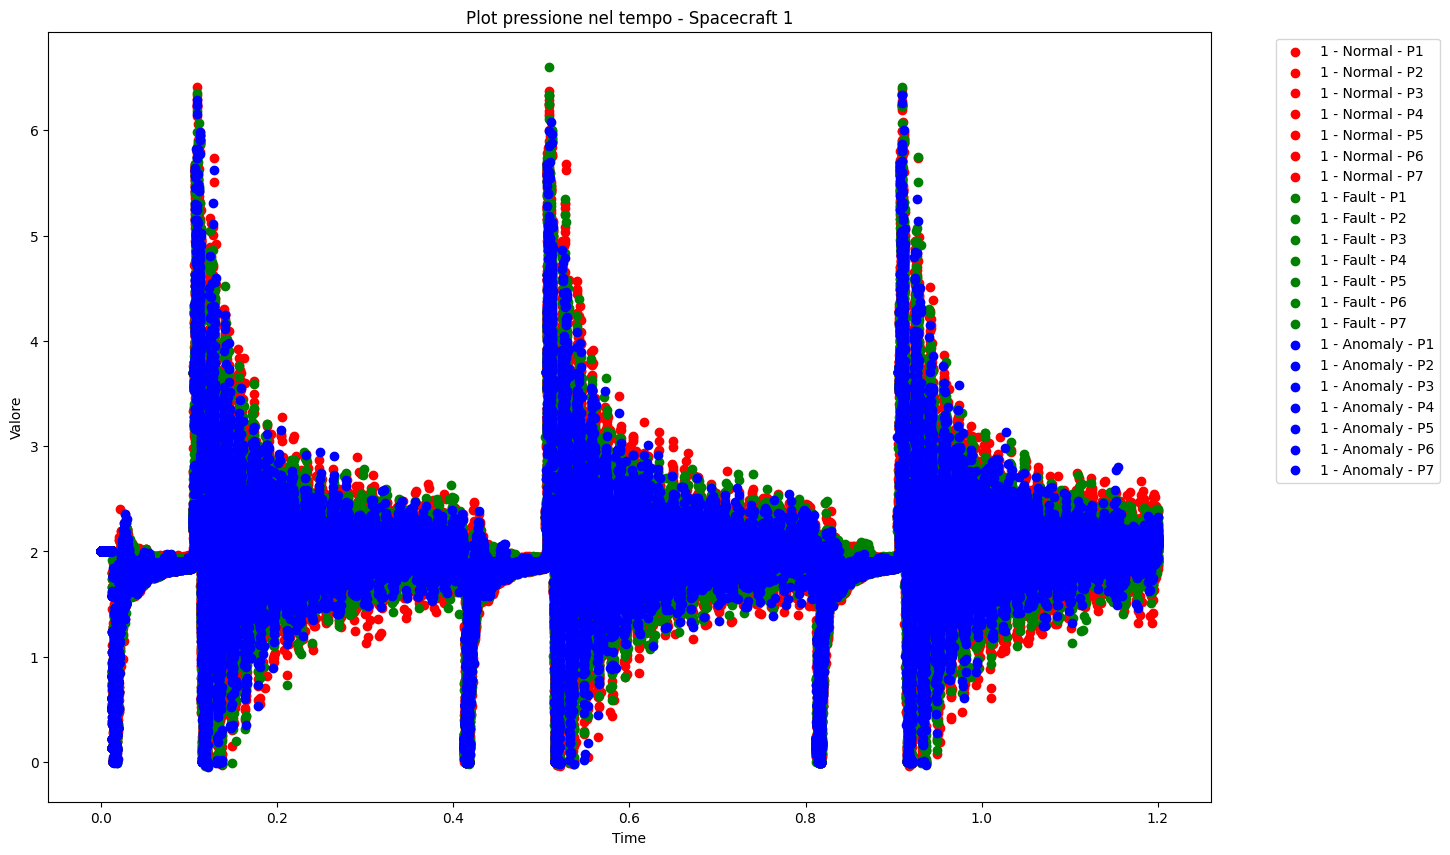

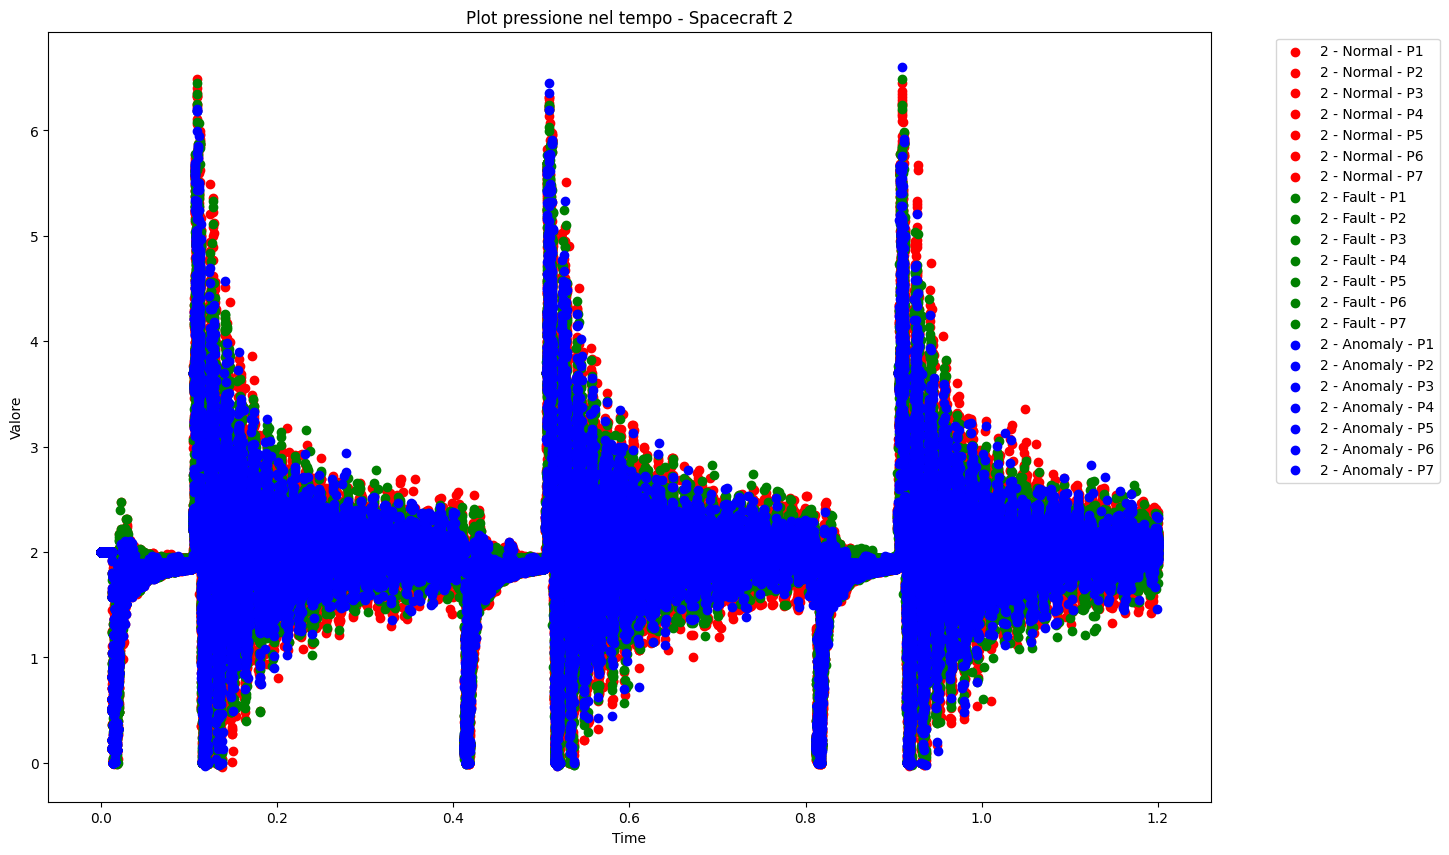

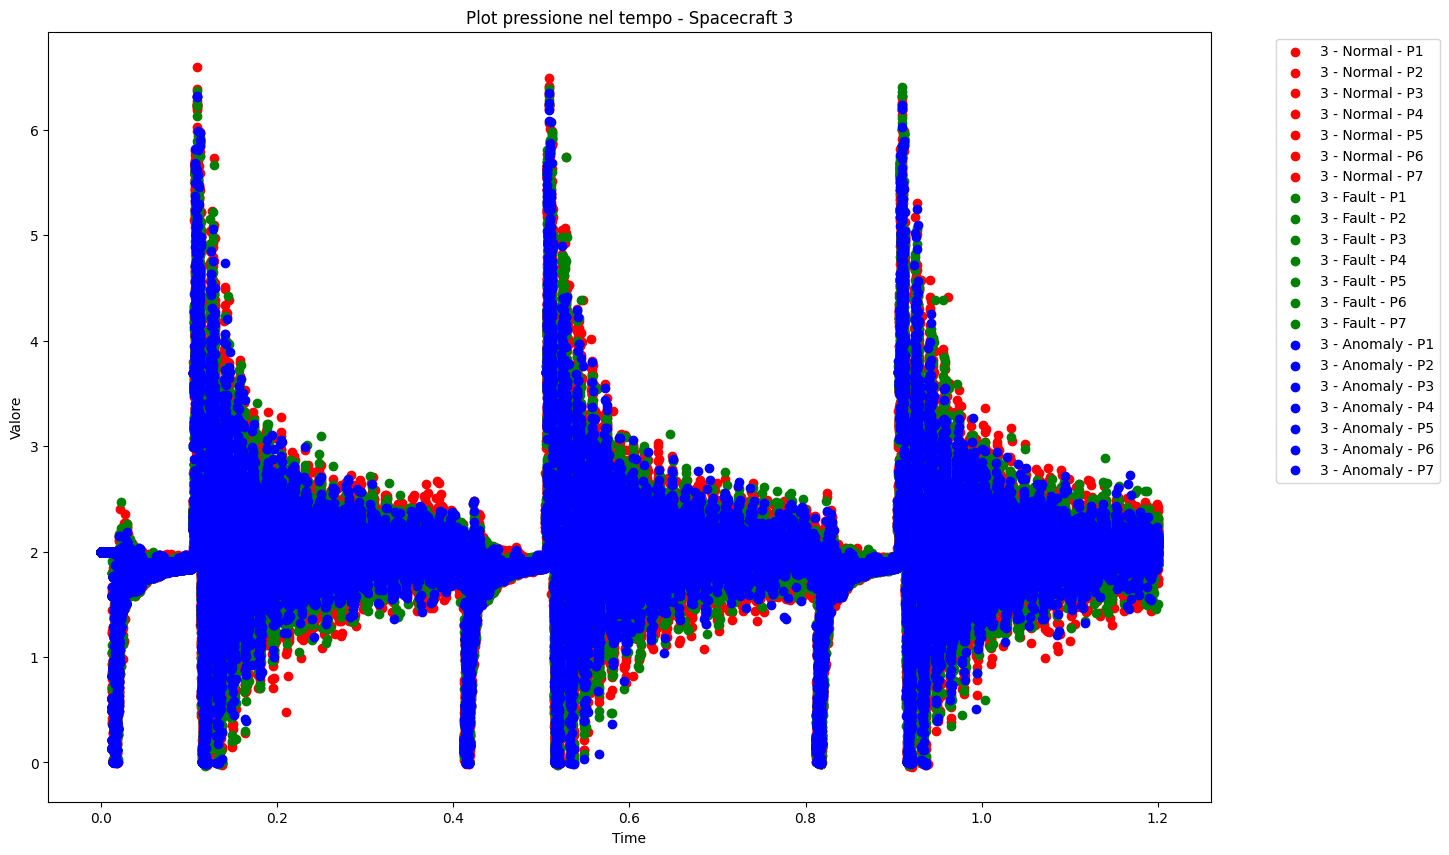

In [106]:


df_data['Condition'] = ''
df_data['Spacecraft'] = ''

num_rows_df_labels = len(df_labels)
num_repeats = len(df_data) // num_rows_df_labels + 1

df_data['Condition'] = np.tile(df_labels['Condition'], num_repeats)[:len(df_data)]
df_data['Spacecraft'] = np.tile(df_labels['Spacecraft'], num_repeats)[:len(df_data)]


df_fault = df_data[df_data["Condition"] == "Fault"]
df_anomaly = df_data[df_data["Condition"] == "Anomaly"]
df_normal = df_data[df_data["Condition"] == "Normal"]


tipi_spacecraft = df_data['Spacecraft'].unique()

# Ottieni tutti i tipi di condition presenti nel DataFrame
tipi_condition = df_data['Condition'].unique()

# Crea un plot per ogni combinazione di Spacecraft e Condition
plt.figure(figsize=(15, 10))

colori_condition = ['red', 'green', 'blue']

# Crea tre plot separati, uno per ogni spacecraft
for spacecraft in tipi_spacecraft:
    plt.figure(figsize=(15, 10))
    
    for i, condition in enumerate(tipi_condition):
        df_subset = df_data[(df_data['Spacecraft'] == spacecraft) & (df_data['Condition'] == condition)]
        
        colonne_da_plottare = df_subset.columns.difference(['TIME', 'Spacecraft', 'Condition'])

        for colonna in colonne_da_plottare:
            label = f'{spacecraft} - {condition} - {colonna}'
            plt.scatter(df_subset['TIME'], df_subset[colonna], label=label, color=colori_condition[i])

    plt.title(f'Plot pressione nel tempo - Spacecraft {spacecraft}')
    plt.xlabel('Time')
    plt.ylabel('Valore')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.show()
    


In [108]:
df_anomaly

TIME        P1        P2        P3        P4        P5        P6  \
153     0.153  2.094621  1.946831  1.836649  1.844096  2.060935  2.000400   
154     0.154  2.256115  2.247972  2.191902  2.160774  2.240431  2.441819   
155     0.155  2.219881  2.438467  2.705498  2.572015  2.611796  2.619682   
156     0.156  2.314834  2.742527  2.708762  2.860409  2.654649  2.887657   
157     0.157  2.438946  2.677893  2.916827  2.953889  2.712751  3.043282   
...       ...       ...       ...       ...       ...       ...       ...   
212572  1.196  1.948734  1.912482  1.904362  1.835654  1.924899  1.857220   
212573  1.197  1.948823  1.899824  1.884360  1.825497  1.927513  1.846068   
212574  1.198  1.957784  1.911383  1.893740  1.859805  1.940953  1.861668   
212575  1.199  1.970451  1.950009  1.945417  1.913911  1.953648  1.835381   
212576  1.200  1.988895  1.997232  2.003571  1.989339  1.981822  1.888756   

              P7 Condition  Spacecraft  
153     1.783702   Anomaly           1  
154     2.404177   Anomaly           1  
155     2.765371   Anomaly           1  
156     2.913860   Anomaly           1  
157     2.943962   Anomaly           1  
...          ...       ...         ...  
212572  1.920020   Anomaly           3  
212573  1.919081   Anomaly           3  
212574  1.950562   Anomaly           3  
212575  1.983321   Anomaly           3  
212576  1.985784   Anomaly           3  

[28824 rows x 10 columns]

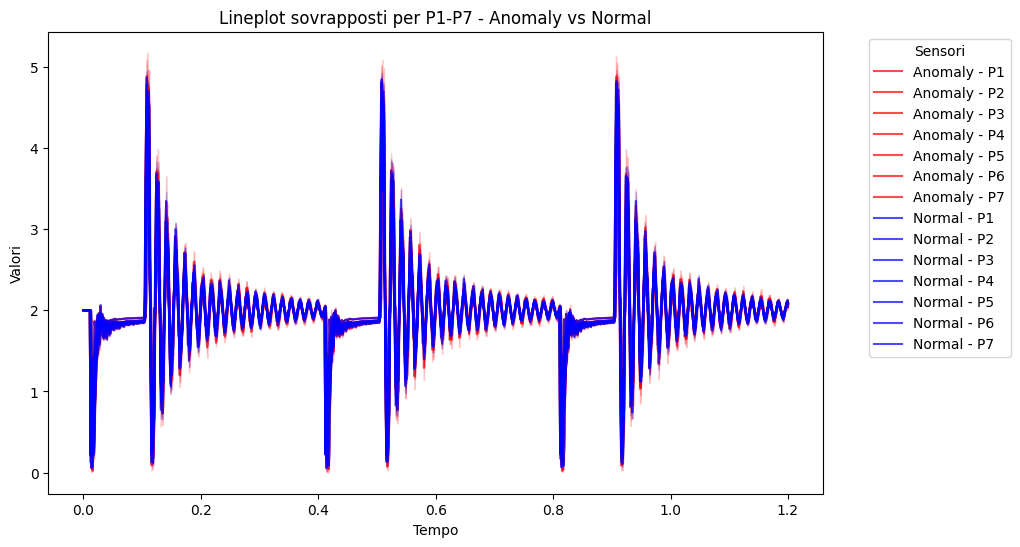

In [109]:


plt.figure(figsize=(10, 6))
for column in df_anomaly.columns.difference(['TIME',"Spacecraft","Condition"]):
    sns.lineplot(x='TIME', y=column, data=df_anomaly, label=f'Anomaly - {column}', alpha=0.7, color='red')

for column in df_normal.columns.difference(['TIME',"Spacecraft","Condition"]):
    sns.lineplot(x='TIME', y=column, data=df_normal, label=f'Normal - {column}', alpha=0.7, color='blue')

plt.title('Lineplot sovrapposti per P1-P7 - Anomaly vs Normal')
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.legend(title='Sensori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [110]:
# Applicare due condizioni su un DataFrame
df_fault_spacecraft1 = df_data[(df_data["Condition"] == "Fault") & (df_data["Spacecraft"] == 1)]
df_fault_spacecraft2 = df_data[(df_data["Condition"] == "Fault") & (df_data["Spacecraft"] == 2)]
df_fault_spacecraft3 = df_data[(df_data["Condition"] == "Fault") & (df_data["Spacecraft"] == 3)]

df_anomaly_spacecraft1 = df_data[(df_data["Condition"] == "Anomaly") & (df_data["Spacecraft"] == 1)]
df_anomaly_spacecraft2 = df_data[(df_data["Condition"] == "Anomaly") & (df_data["Spacecraft"] == 2)]
df_anomaly_spacecraft3 = df_data[(df_data["Condition"] == "Anomaly") & (df_data["Spacecraft"] == 3)]

df_normal_spacecraft1 = df_data[(df_data["Condition"] == "Normal") & (df_data["Spacecraft"] == 1)]
df_normal_spacecraft2 = df_data[(df_data["Condition"] == "Normal") & (df_data["Spacecraft"] == 2)]
df_normal_spacecraft3 = df_data[(df_data["Condition"] == "Normal") & (df_data["Spacecraft"] == 3)]


df_fault_spacecraft1

TIME        P1        P2        P3        P4        P5        P6  \
105     0.105  1.905542  1.880940  2.381985  2.377740  1.873197  2.353915   
106     0.106  1.907212  2.857429  3.572945  3.757192  2.166846  3.699858   
107     0.107  2.058227  3.827807  4.621134  5.278104  4.283064  3.787134   
108     0.108  3.714886  4.547437  4.253025  4.503020  3.619787  5.031391   
109     0.109  4.011720  3.985482  4.293084  4.005421  5.182309  4.166054   
...       ...       ...       ...       ...       ...       ...       ...   
212516  1.140  2.024265  2.009211  2.000824  1.853501  2.075467  2.081733   
212517  1.141  2.055975  2.068339  2.075496  1.953231  2.083185  2.035811   
212518  1.142  2.070744  2.125443  2.129789  2.062857  2.120344  2.038736   
212519  1.143  2.077038  2.159384  2.192196  2.105830  2.105068  2.050289   
212520  1.144  2.073794  2.150446  2.177823  2.102108  2.108588  2.057082   

              P7 Condition  Spacecraft  
105     2.292202     Fault           1  
106     3.704057     Fault           1  
107     4.198470     Fault           1  
108     5.013518     Fault           1  
109     4.155032     Fault           1  
...          ...       ...         ...  
212516  2.072329     Fault           1  
212517  2.166672     Fault           1  
212518  2.164835     Fault           1  
212519  2.116778     Fault           1  
212520  2.080907     Fault           1  

[19216 rows x 10 columns]

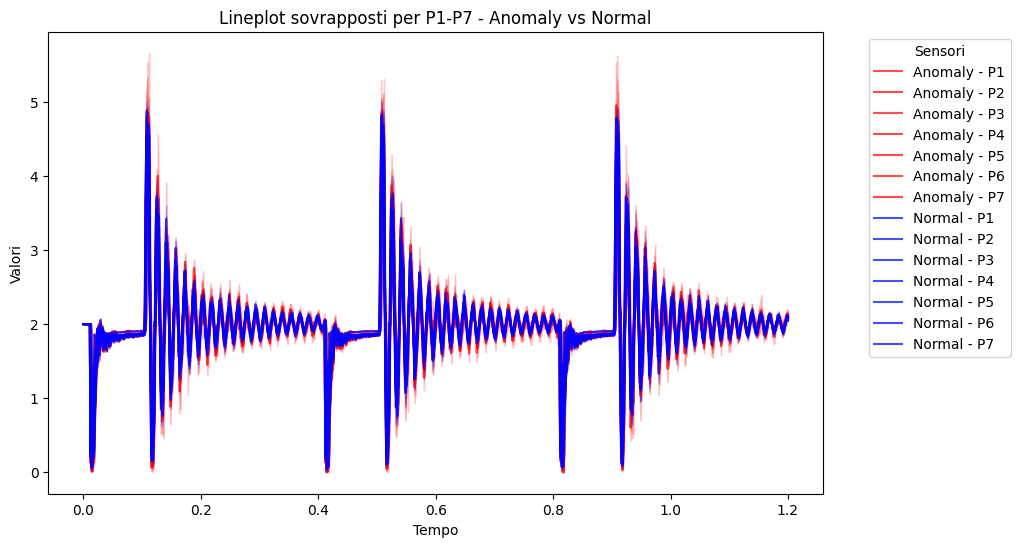

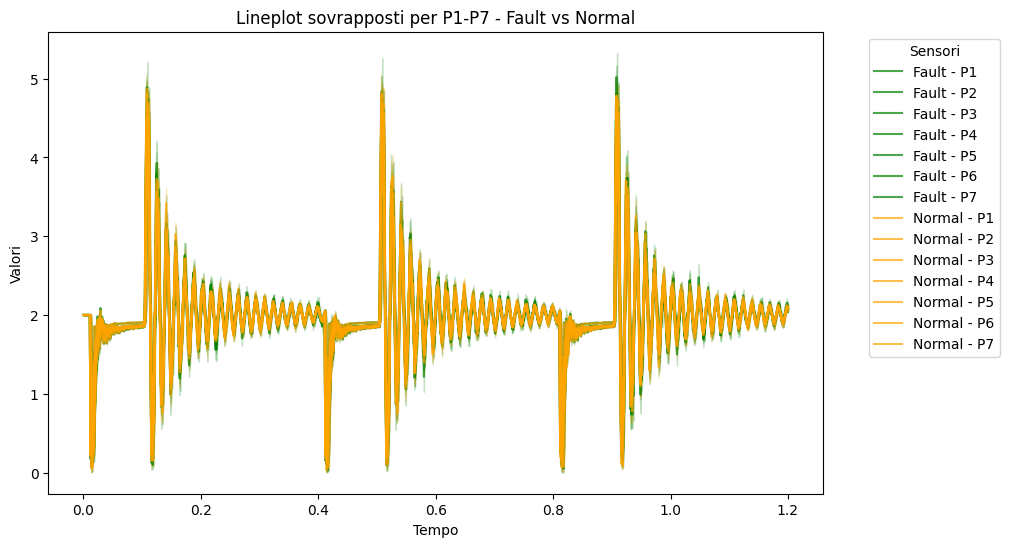

In [118]:
plt.figure(figsize=(10, 6))
for column in df_anomaly_spacecraft1.columns.difference(["TIME","Spacecraft","Condition"]):
    sns.lineplot(x="TIME", y=column, data=df_anomaly_spacecraft1 , label=f'Anomaly - {column}', alpha=0.7, color='red')

for column in df_normal_spacecraft1.columns.difference(["TIME","Spacecraft","Condition"]):
    sns.lineplot(x="TIME", y=column, data=df_normal_spacecraft1 , label=f'Normal - {column}', alpha=0.7, color='blue')

plt.title('Lineplot sovrapposti per P1-P7 - Anomaly vs Normal')
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.legend(title='Sensori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
for column in df_fault_spacecraft1.columns.difference(["TIME","Spacecraft","Condition"]):
    sns.lineplot(x="TIME", y=column, data=df_fault_spacecraft1 , label=f'Fault - {column}', alpha=0.7, color='green')

for column in df_normal_spacecraft1.columns.difference(["TIME","Spacecraft","Condition"]):
    sns.lineplot(x="TIME", y=column, data=df_normal_spacecraft1 , label=f'Normal - {column}', alpha=0.7, color='orange')

plt.title('Lineplot sovrapposti per P1-P7 - Fault vs Normal')
plt.xlabel('Tempo')
plt.ylabel('Valori')
plt.legend(title='Sensori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

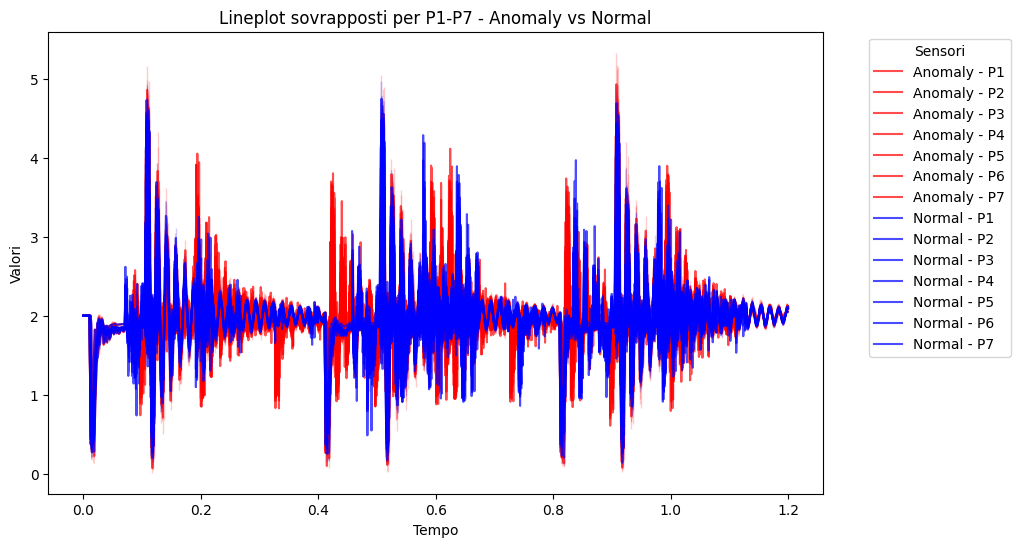

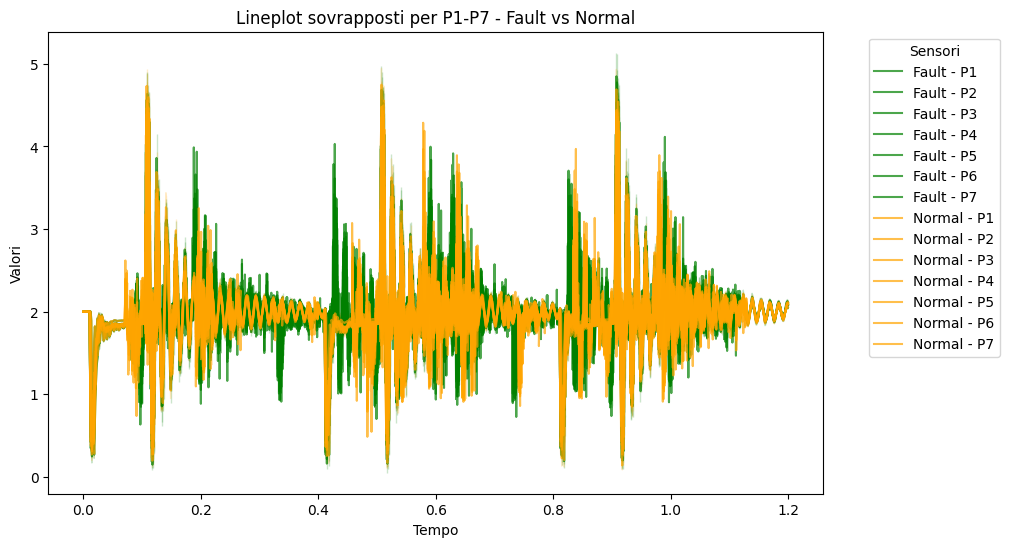

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione per applicare l'Exponential Weighted Moving Average (EWMA) ai dati
def apply_ewma(data, window_size=2):
    #EWMA
    #numeric_columns = data.select_dtypes(include='number').columns
    #return data[numeric_columns].ewm(span=span).mean()
    
    # Filtro Savitzky-Golay
    numeric_columns = data.select_dtypes(include='number').columns
    return data[numeric_columns].apply(lambda x: x.rolling(window=window_size, min_periods=1, center=True).median())

# Funzione per generare il plot con i dati filtrati
def plot_filtered_data(df_anomaly, df_normal, df_fault, span=50):
    plt.figure(figsize=(10, 6))

    for column in df_anomaly.columns.difference(["TIME", "Spacecraft", "Condition"]):
        sns.lineplot(x="TIME", y=column, data=apply_ewma(df_anomaly, span),
                     label=f'Anomaly - {column}', alpha=0.7, color='red')

    for column in df_normal.columns.difference(["TIME", "Spacecraft", "Condition"]):
        sns.lineplot(x="TIME", y=column, data=apply_ewma(df_normal, span),
                     label=f'Normal - {column}', alpha=0.7, color='blue')

    plt.title('Lineplot sovrapposti per P1-P7 - Anomaly vs Normal')
    plt.xlabel('Tempo')
    plt.ylabel('Valori')
    plt.legend(title='Sensori', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    plt.figure(figsize=(10, 6))
    for column in df_fault.columns.difference(["TIME", "Spacecraft", "Condition"]):
        sns.lineplot(x="TIME", y=column, data=apply_ewma(df_fault, span),
                     label=f'Fault - {column}', alpha=0.7, color='green')

    for column in df_normal.columns.difference(["TIME", "Spacecraft", "Condition"]):
        sns.lineplot(x="TIME", y=column, data=apply_ewma(df_normal, span),
                     label=f'Normal - {column}', alpha=0.7, color='orange')

    plt.title('Lineplot sovrapposti per P1-P7 - Fault vs Normal')
    plt.xlabel('Tempo')
    plt.ylabel('Valori')
    plt.legend(title='Sensori', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Esempio di utilizzo con span di EWMA pari a 5
plot_filtered_data(df_anomaly_spacecraft1, df_normal_spacecraft1, df_fault_spacecraft1, span=2)

# è peggio! 
# Niente filtro

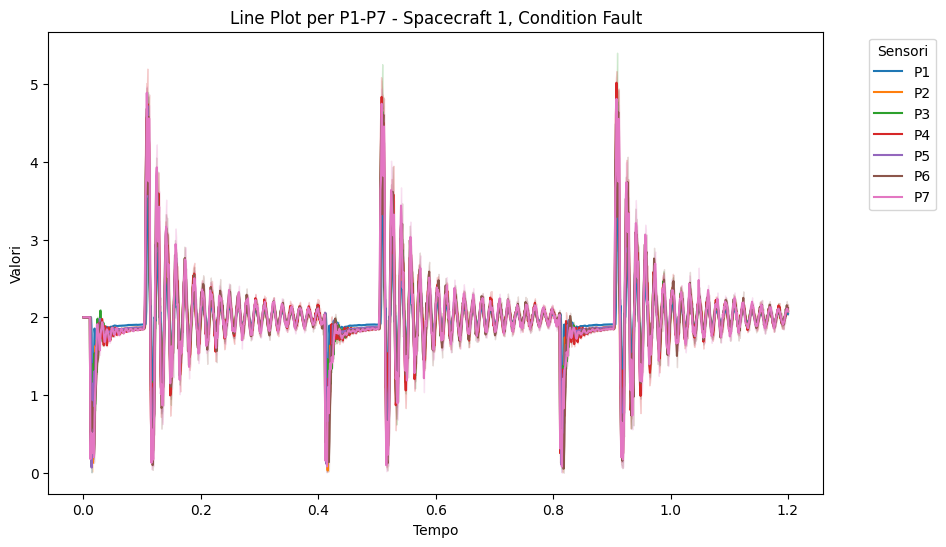

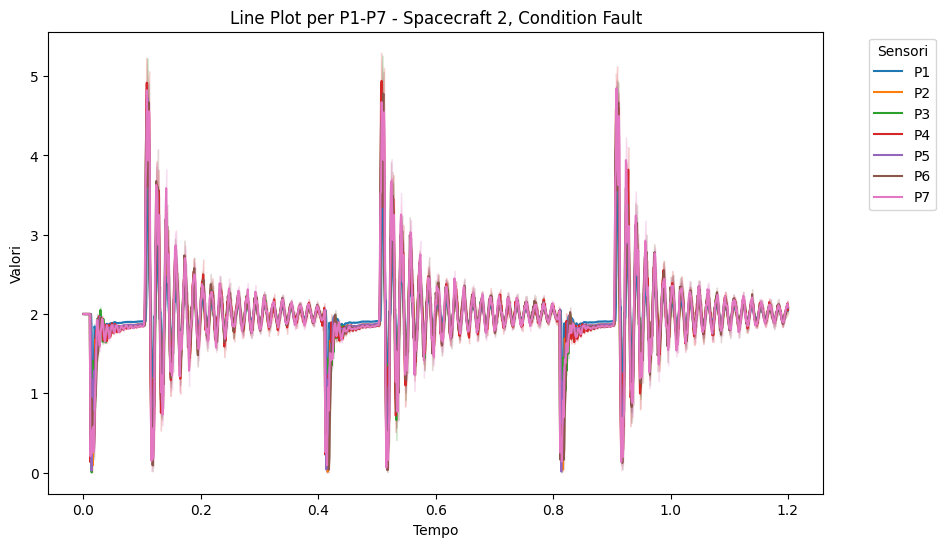

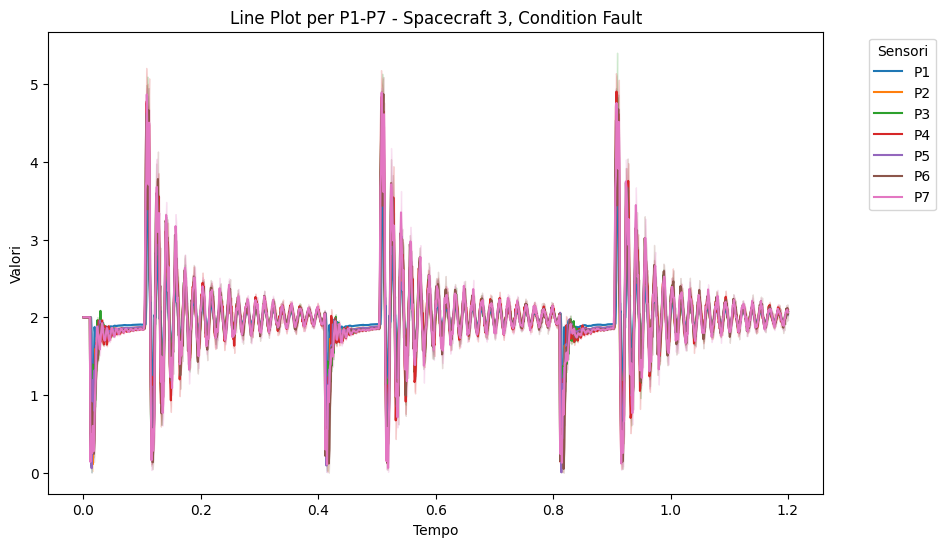

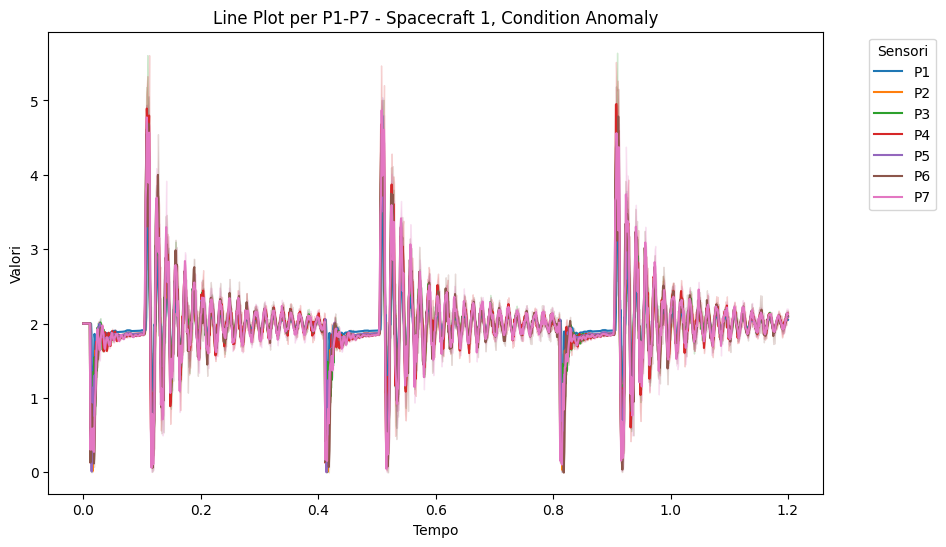

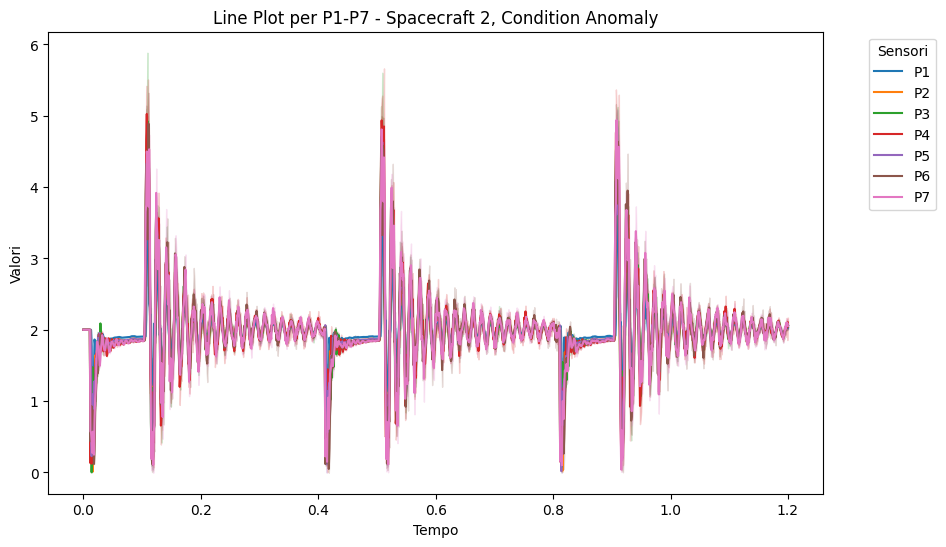

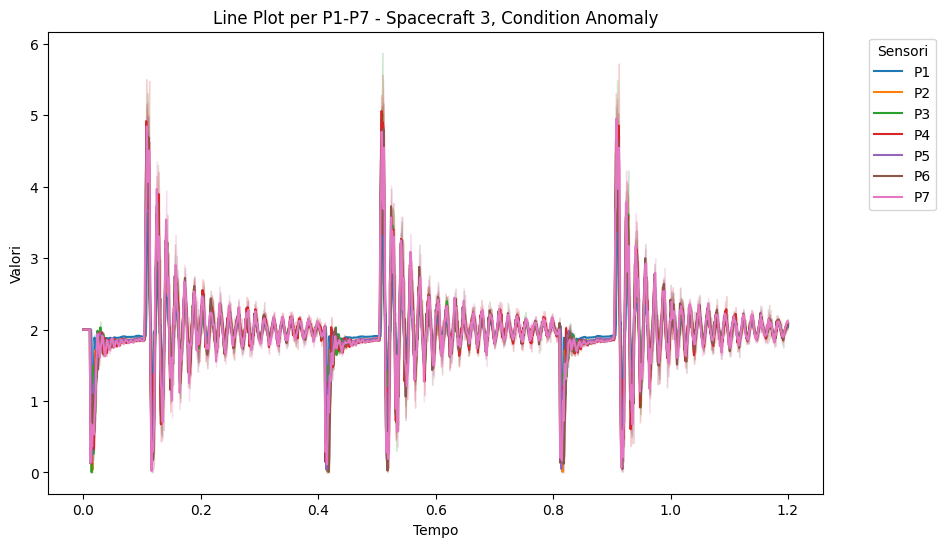

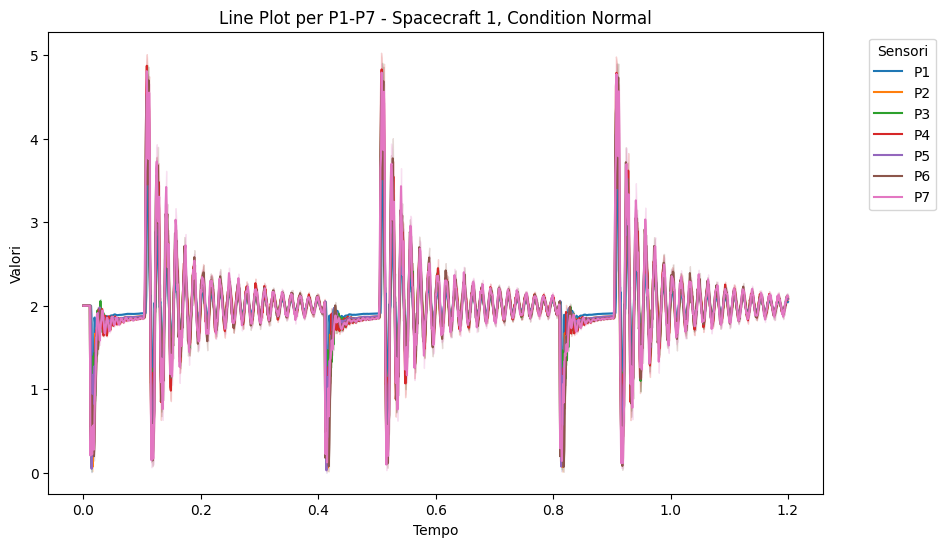

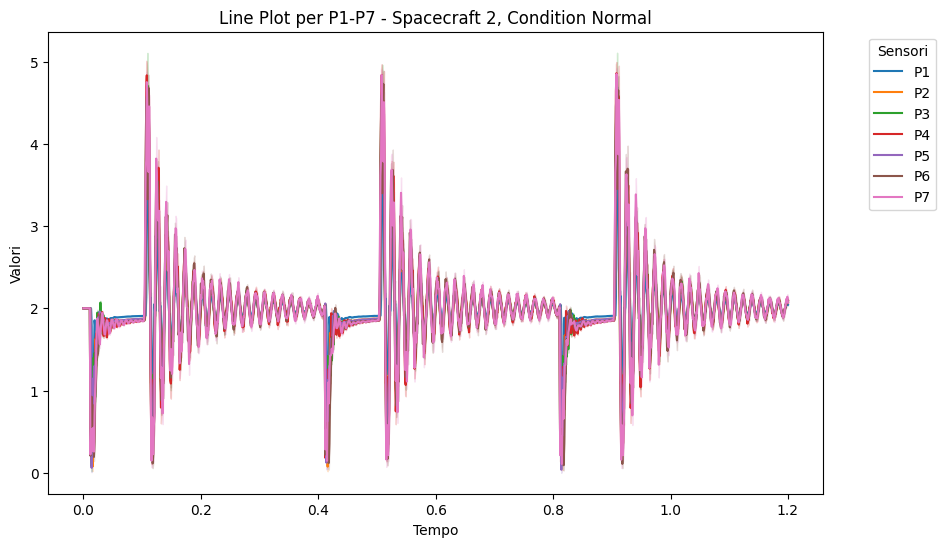

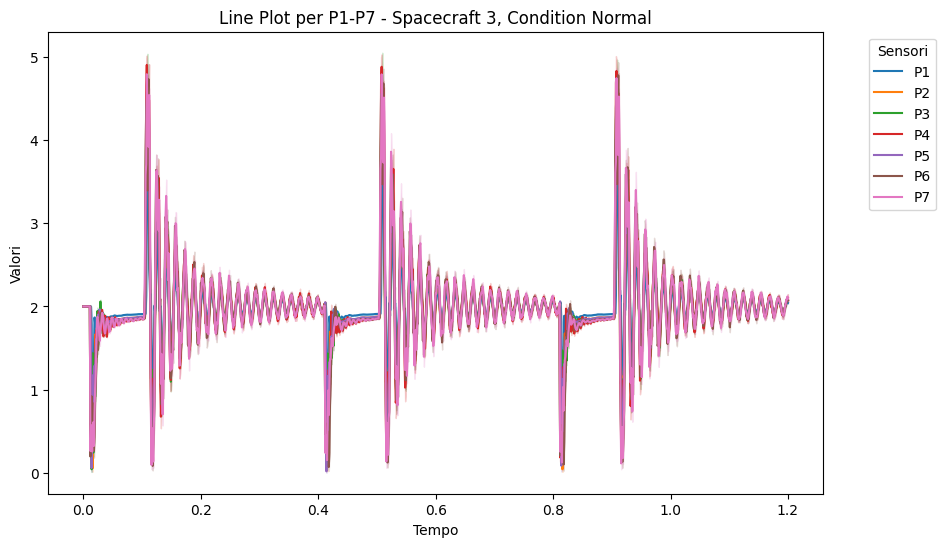

In [124]:
dataframes = [df_fault, df_anomaly, df_normal]
# Supponendo che tu abbia già un DataFrame chiamato df_data
# Assicurati che la colonna 'Time' sia di tipo datetime
df_data['TIME'] = pd.to_datetime(df_data['TIME'])

# Lista delle colonne diverse da 'Condition' e 'Spacecraft'
columns_to_plot = df_data.columns.difference(['Condition', 'Spacecraft', 'TIME'])

# Iterazione su ogni dataframe
for df_subset in dataframes:
    # Iterazione su ogni valore unico di Spacecraft
    for spacecraft in df_subset['Spacecraft'].unique():
        # Filtra il dataframe per Spacecraft specifico
        df_spacecraft = df_subset[df_subset['Spacecraft'] == spacecraft]

        # Creazione del line plot per ogni colonna P1-P7 nella stessa figura
        plt.figure(figsize=(10, 6))
        for column in columns_to_plot:
            sns.lineplot(x='TIME', y=column, data=df_spacecraft, label=column)

        plt.title(f'Line Plot per P1-P7 - Spacecraft {spacecraft}, Condition {df_subset["Condition"].iloc[0]}')
        plt.xlabel('Tempo')
        plt.ylabel('Valori')
        plt.legend(title='Sensori', bbox_to_anchor=(1.05, 1), loc='upper left')
        #plt.show()

In [7]:
from scipy.stats import kurtosis, skew
def extract_temporal_features(time_series):
    features = {
        'Minimo': time_series.min(),
        'Massimo': time_series.max(),
        'Media': time_series.mean(),
        'Mediana': time_series.median(),
        'Primo_Quartile': time_series.quantile(0.25),
        'Terzo_Quartile': time_series.quantile(0.75),
        'Varianza': time_series.var(),
        'Deviazione_Standard': time_series.std(),
        'Kurtosi': kurtosis(time_series),
        'Skewness': skew(time_series)
    }
    return features


temporal_features_list = []

for df in frames:
    df = df.set_index("TIME")
    
# Estraiamo le feature temporali statistiche
        
    # Estraiamo le feature temporali statistiche
    features = extract_temporal_features(df)
    features = pd.DataFrame(features)
    
    # Aggiungi le feature alla lista
    temporal_features_list.append(features)

# Visualizziamo le feature estratte
df_features = pd.concat(temporal_features_list)

df_features

Minimo   Massimo     Media   Mediana  Primo_Quartile  Terzo_Quartile  \
P1  0.436248  4.228663  1.984867  1.956786        1.893564        2.059497   
P2  0.009566  4.550720  1.977633  1.923029        1.842986        2.106798   
P3  0.001759  4.624689  1.972524  1.923788        1.829711        2.116573   
P4  0.122087  5.282506  1.976226  1.912265        1.813689        2.124293   
P5 -0.001758  5.185785  1.977734  1.928335        1.840813        2.110727   
..       ...       ...       ...       ...             ...             ...   
P3 -0.003378  6.139742  1.973913  1.936228        1.835394        2.100806   
P4 -0.000191  5.598166  1.972963  1.921344        1.803647        2.111387   
P5  0.000563  4.176693  1.980465  1.928023        1.843614        2.105083   
P6 -0.043870  5.624522  1.934539  1.911232        1.785872        2.147129   
P7 -0.003840  5.136296  1.967085  1.922463        1.807345        2.117002   

    Varianza  Deviazione_Standard    Kurtosi  Skewness  
P1  0.095184             0.308519  18.304141  1.636982  
P2  0.199004             0.446099   8.886967  1.061782  
P3  0.257802             0.507742   7.607815  0.870850  
P4  0.287829             0.536497   9.033065  1.359759  
P5  0.227351             0.476813  11.035056  1.276122  
..       ...                  ...        ...       ...  
P3  0.275849             0.525213  16.265555  2.106395  
P4  0.342086             0.584882  11.981593  1.691035  
P5  0.205441             0.453256   7.630736  0.909473  
P6  0.380061             0.616491   7.897513  0.564622  
P7  0.354307             0.595237   7.565554  0.981083  

[1239 rows x 10 columns]

Valutazione delle feature attraverso correlazioni

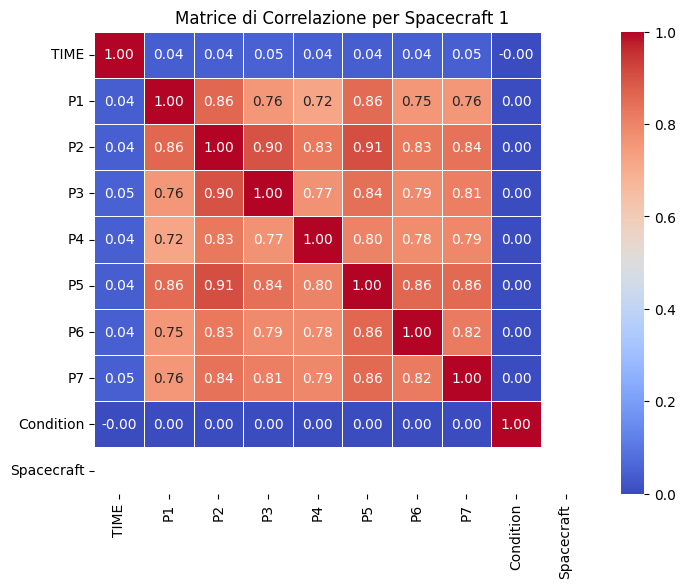

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


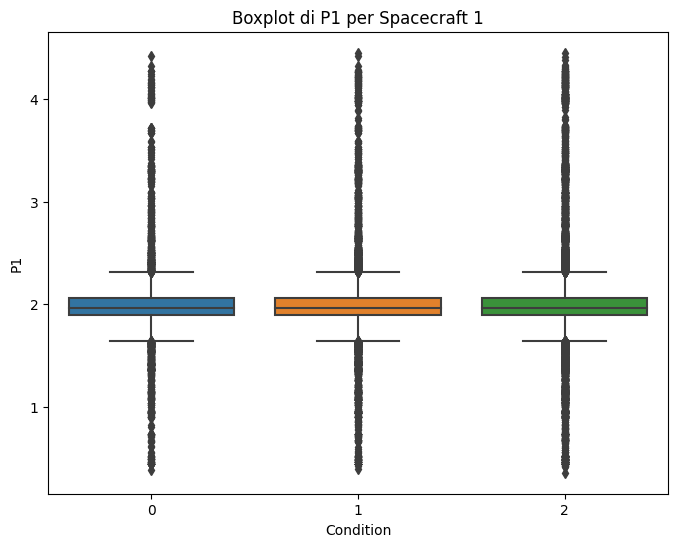

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


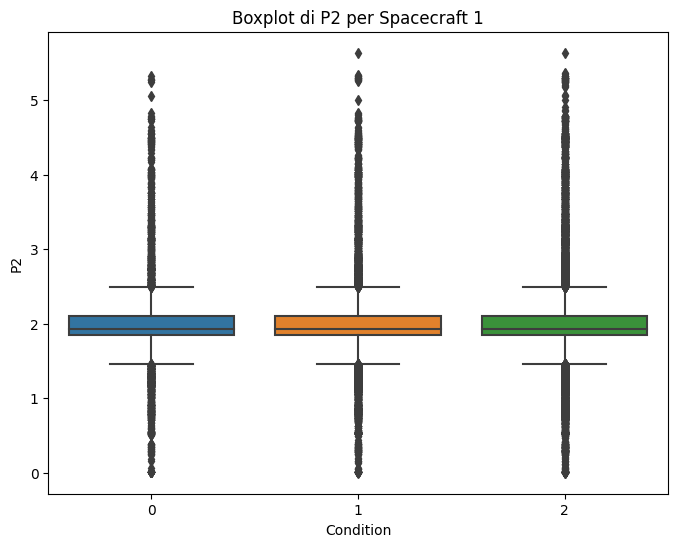

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


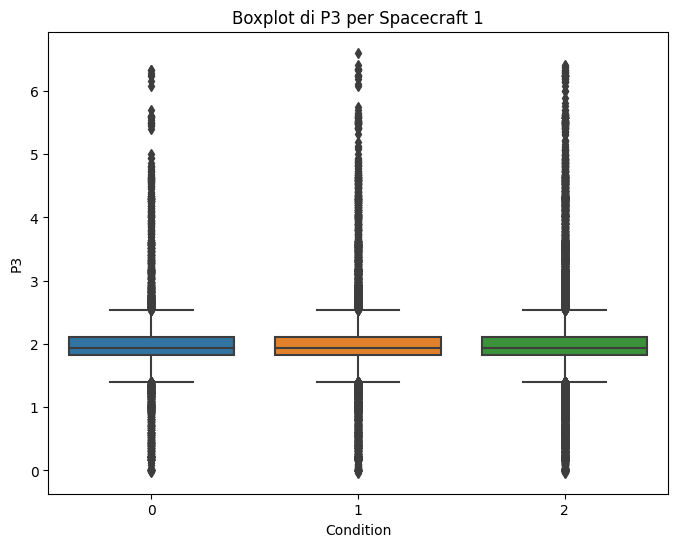

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


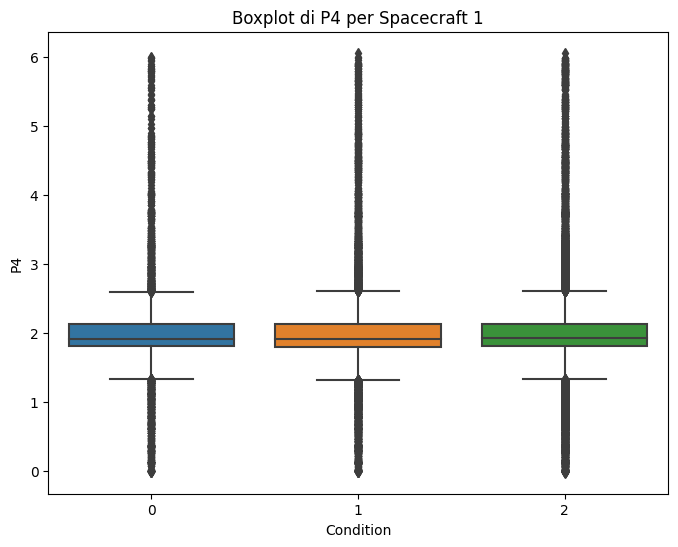

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


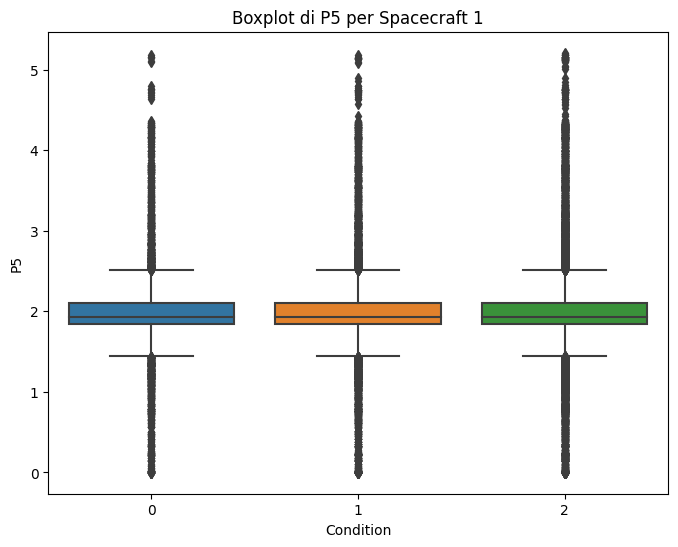

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


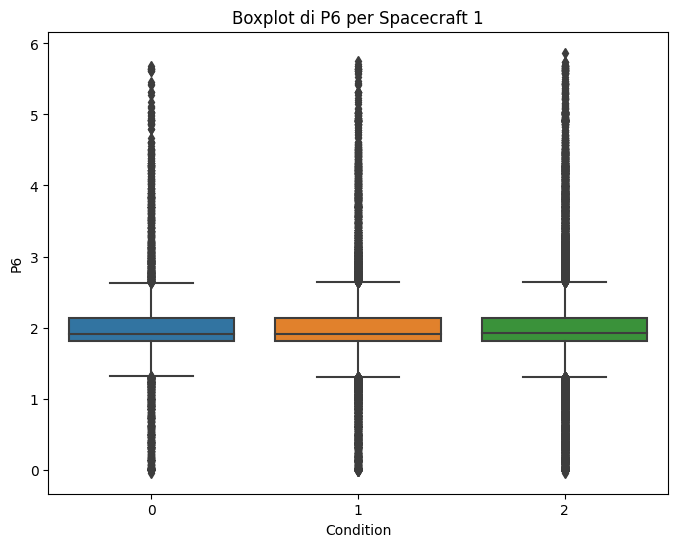

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


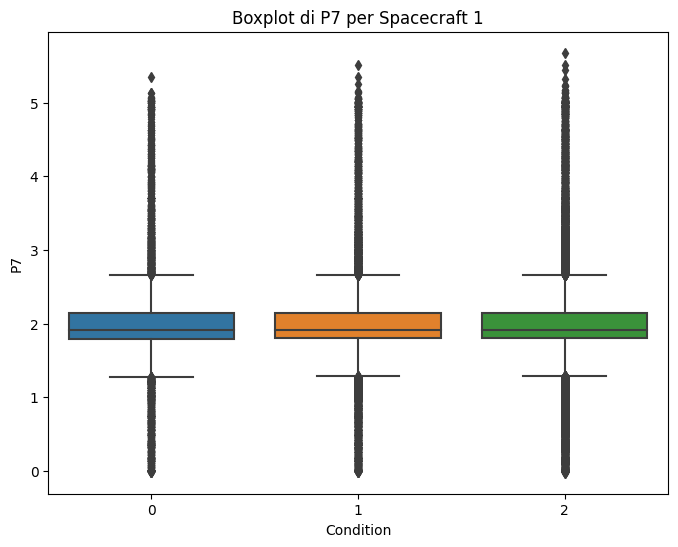

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


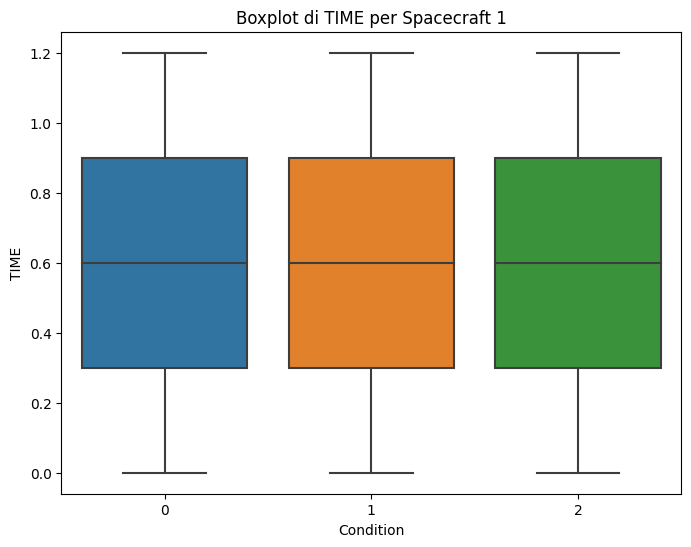

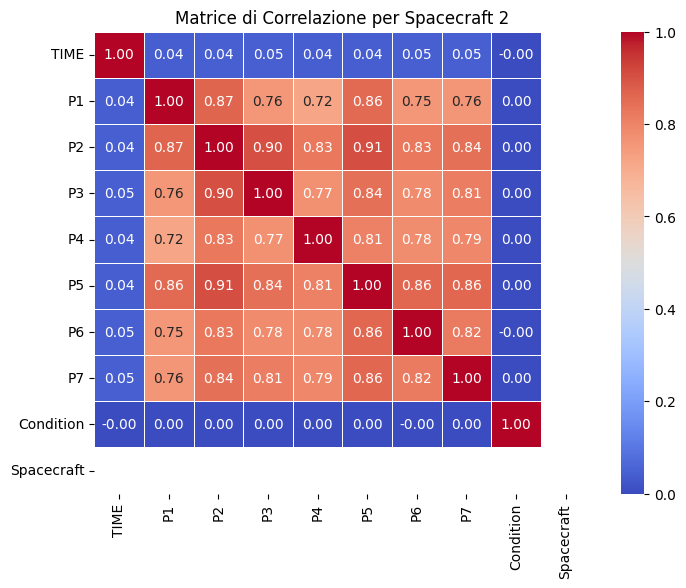

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


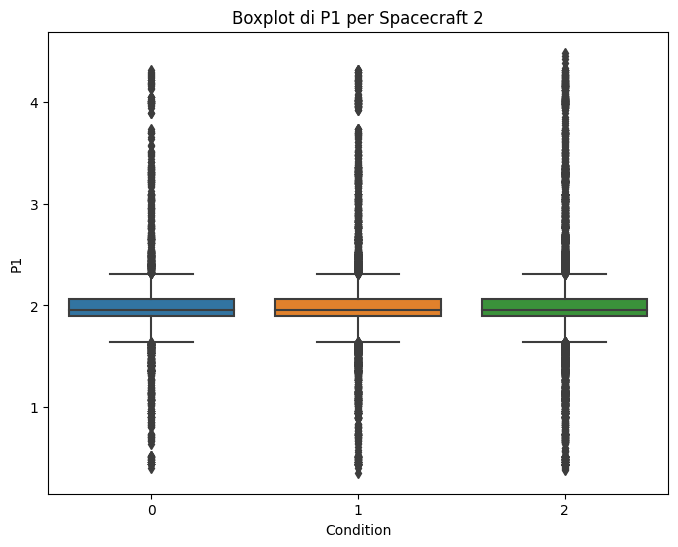

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


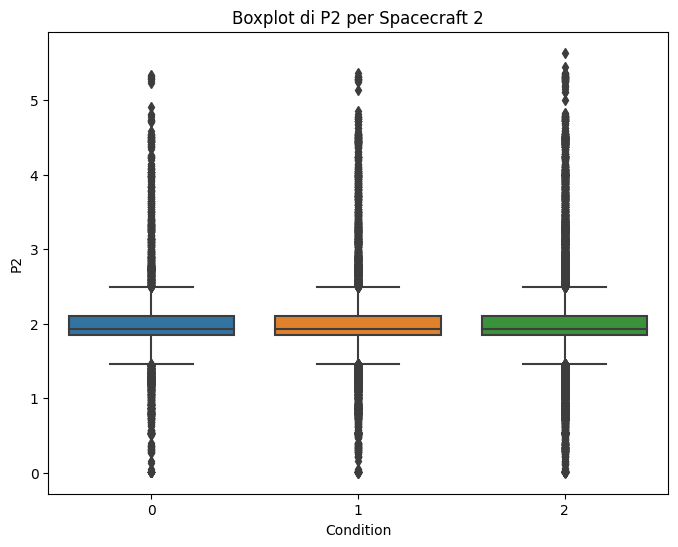

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


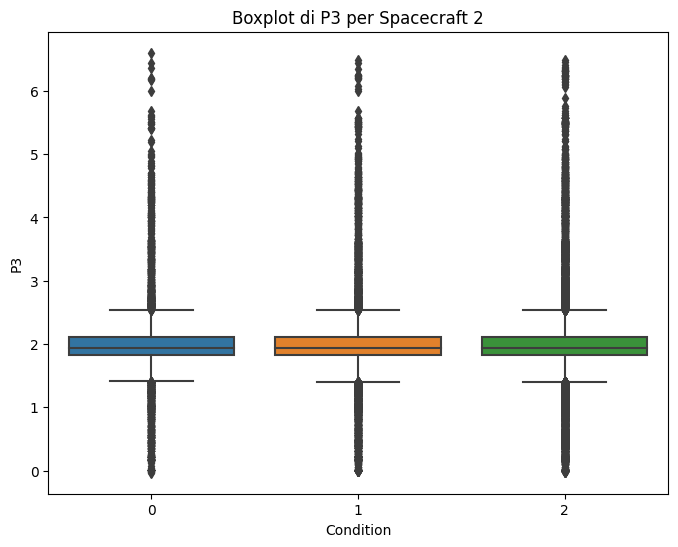

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


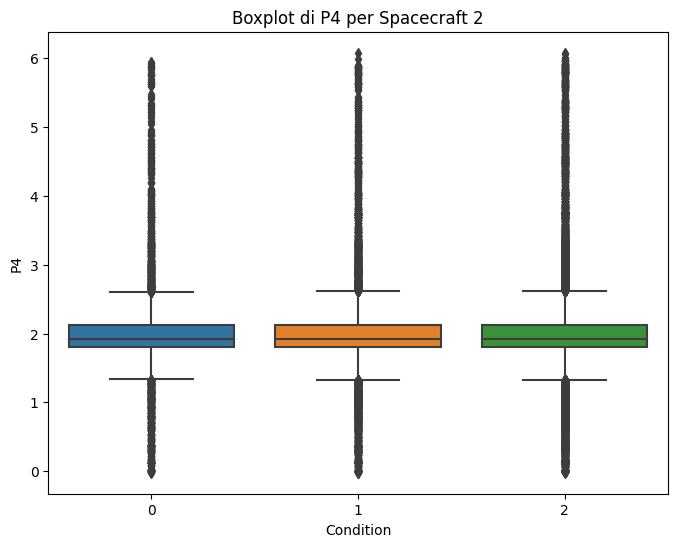

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


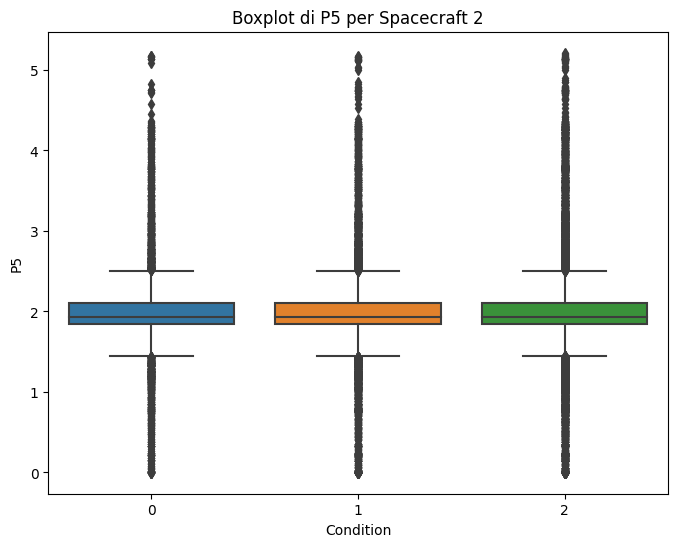

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


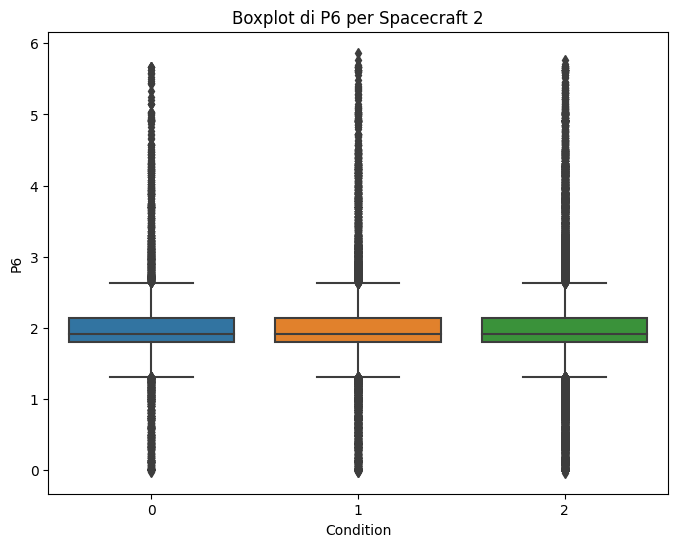

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


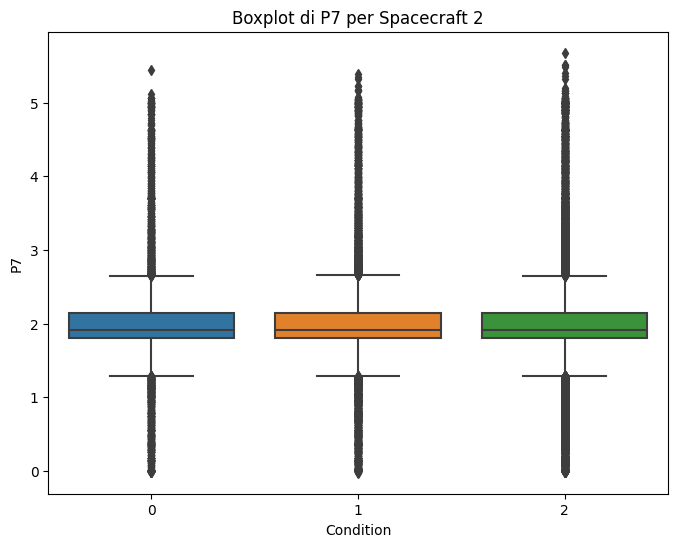

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


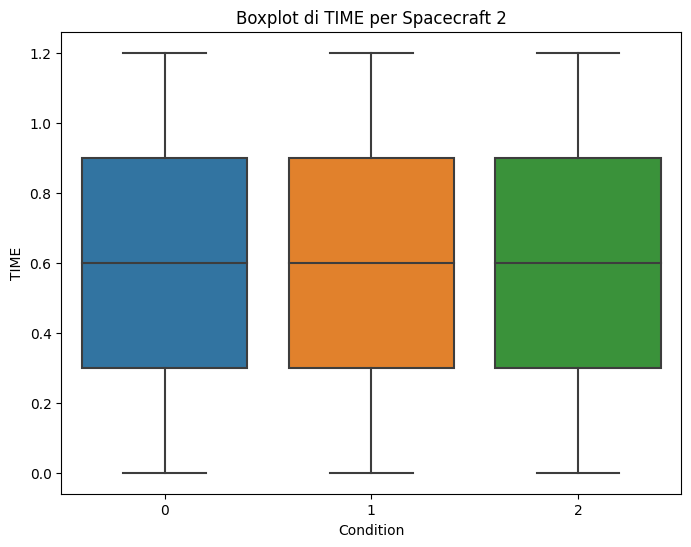

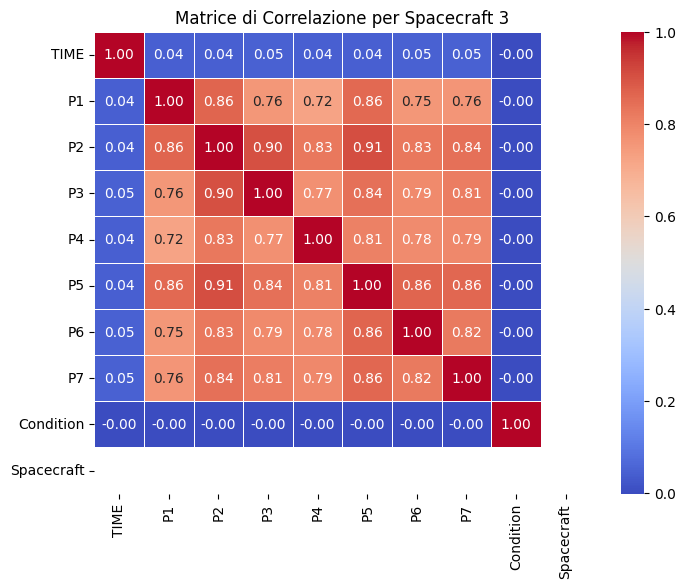

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


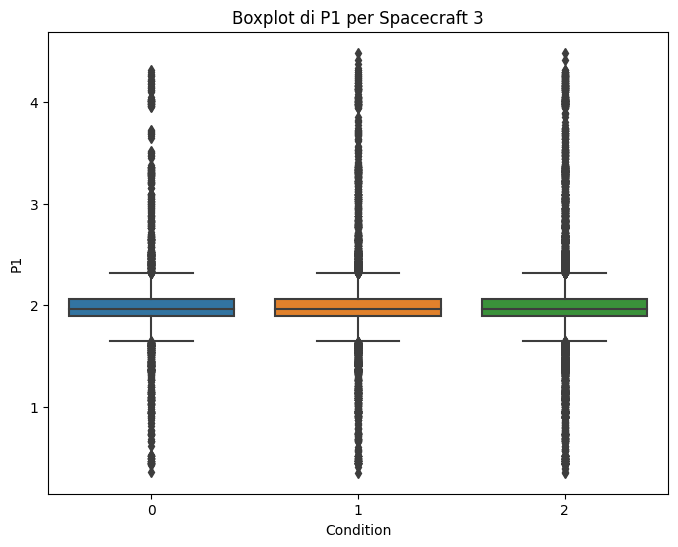

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


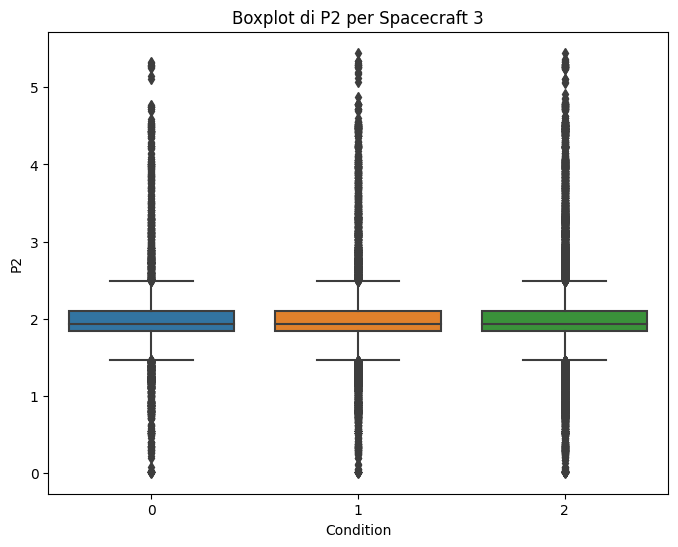

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


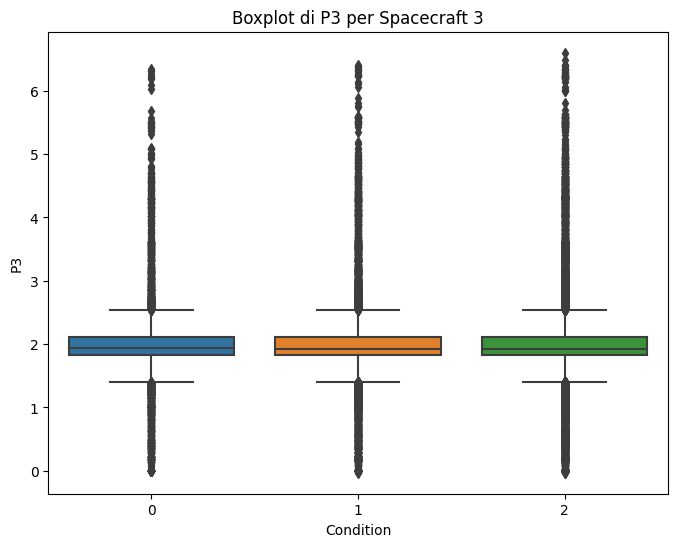

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


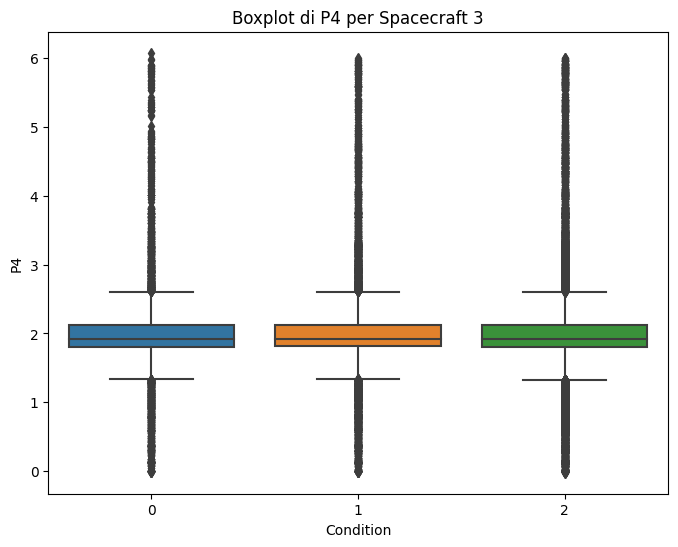

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


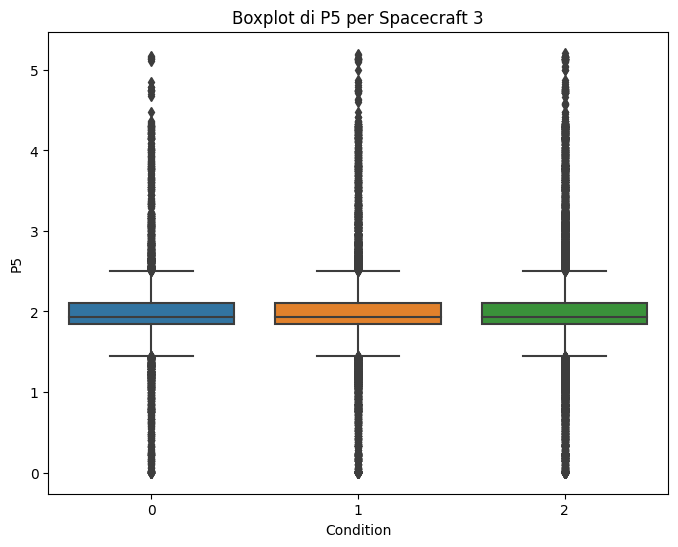

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


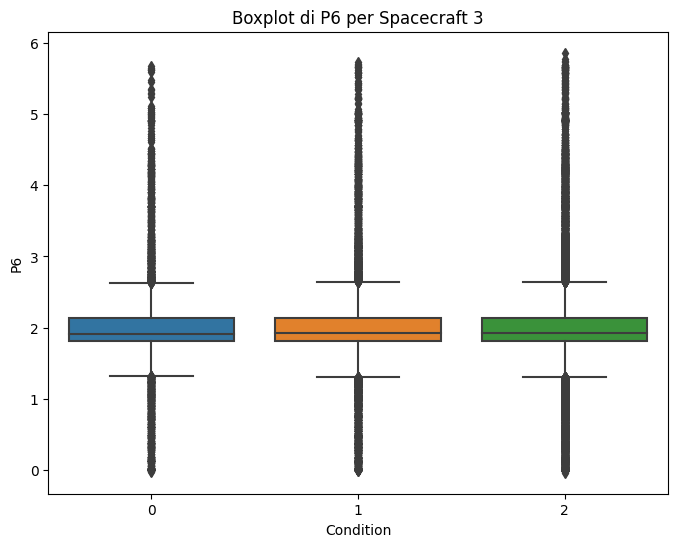

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


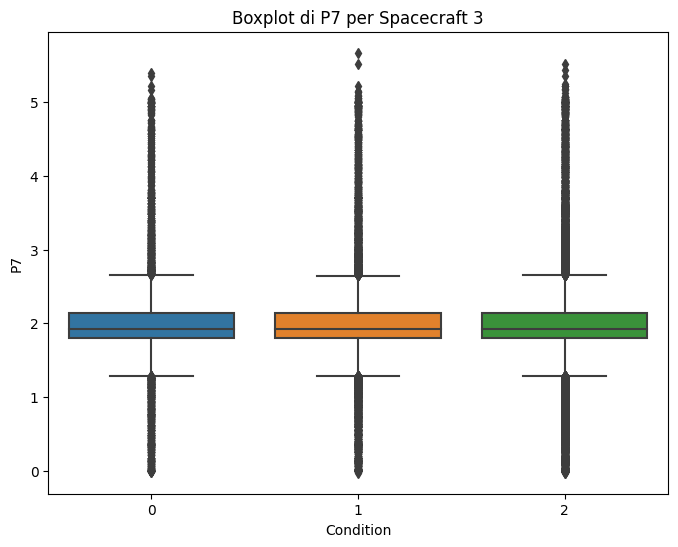

c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alexandru.Dediu\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


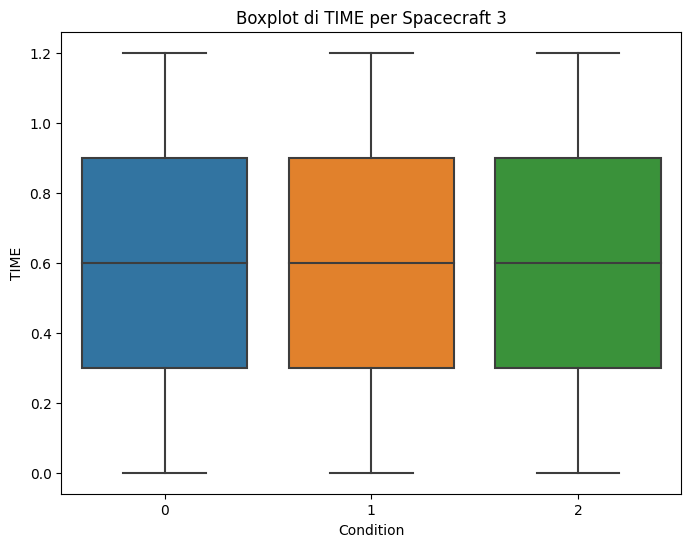

In [45]:



df_spacecraft1 = df_data[df_data["Spacecraft"] == 1]
df_spacecraft2 = df_data[df_data["Spacecraft"] == 2]
df_spacecraft3 = df_data[df_data["Spacecraft"] == 3]

categorical_features = ['Condition']
# Supponendo che tu abbia già i DataFrame df_spacecraft1, df_spacecraft2, df_spacecraft3
# Esempio: df_spacecraft1 = df_data[df_data["Spacecraft"] == 1]
#         df_spacecraft2 = df_data[df_data["Spacecraft"] == 2]
#         df_spacecraft3 = df_data[df_data["Spacecraft"] == 3]


for i, df_spacecraft in enumerate([df_spacecraft1, df_spacecraft2, df_spacecraft3], start=1):
    # Copia il DataFrame originale
    df_spacecraft_encoded = df_spacecraft.copy()

    # Codifica le colonne categoriche in numeri
    label_encoder = LabelEncoder()
    for col in categorical_features:
        if df_spacecraft[col].dtype == 'object':
            df_spacecraft_encoded[col] = label_encoder.fit_transform(df_spacecraft[col])

    # Seleziona solo colonne numeriche per il calcolo della correlazione
    numeric_columns = df_spacecraft_encoded.select_dtypes(include='number').columns
    correlation_matrix = df_spacecraft_encoded[numeric_columns].corr()

    # Creazione di heatmap per la matrice di correlazione
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Matrice di Correlazione per Spacecraft {i}')
    plt.show()

    # Creazione di boxplot per l'analisi univariata
    features_to_analyze = df_spacecraft_encoded.columns.difference(['Time', 'Spacecraft', 'Condition'])
    for feature in features_to_analyze:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Condition', y=feature, data=df_spacecraft_encoded)
        plt.title(f'Boxplot di {feature} per Spacecraft {i}')
        plt.show()


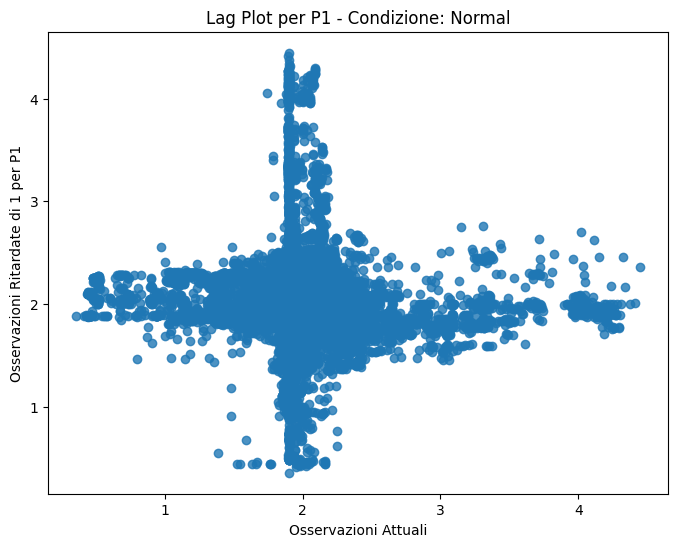

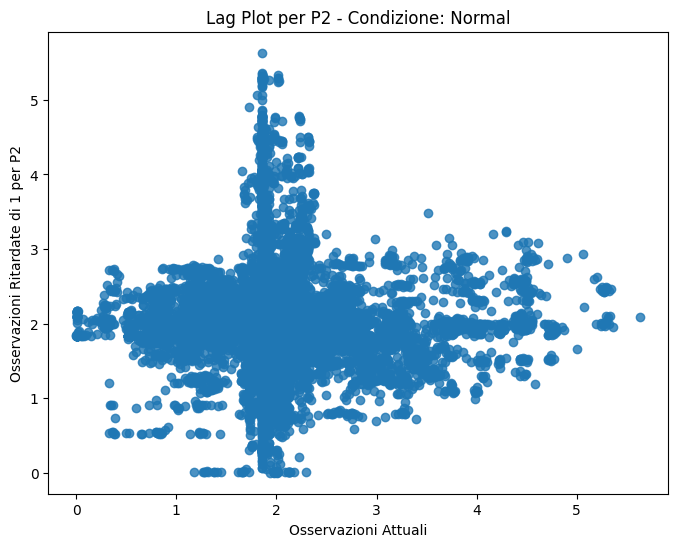

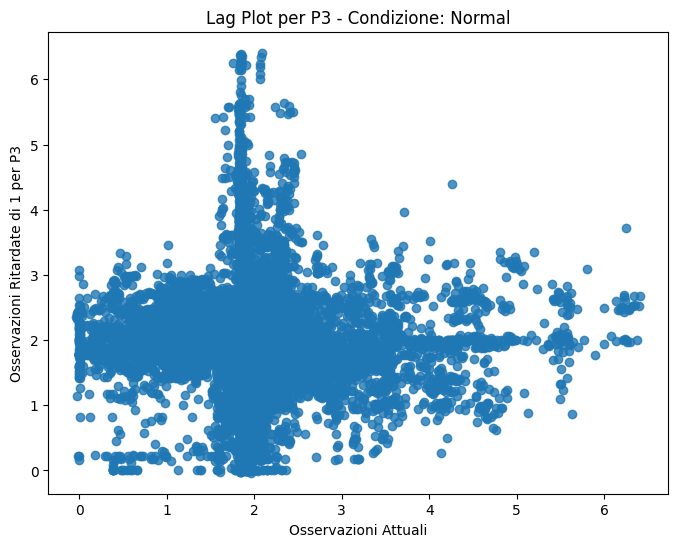

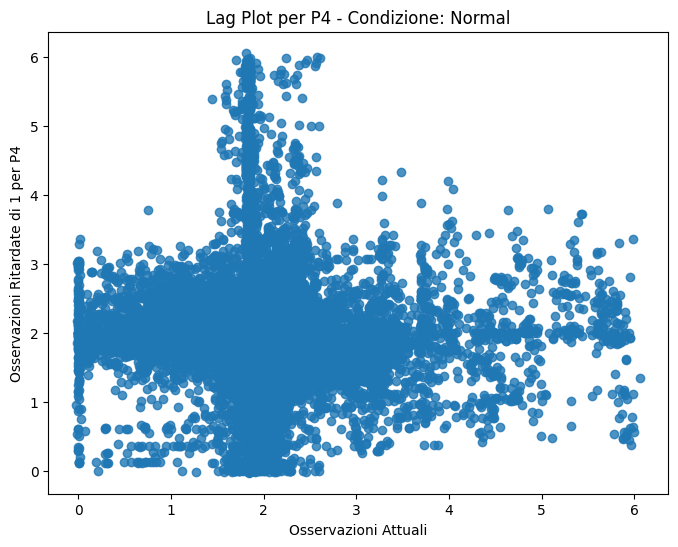

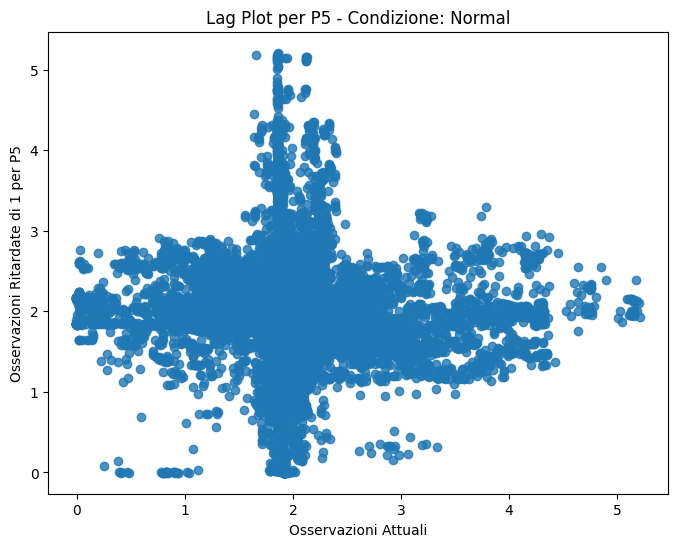

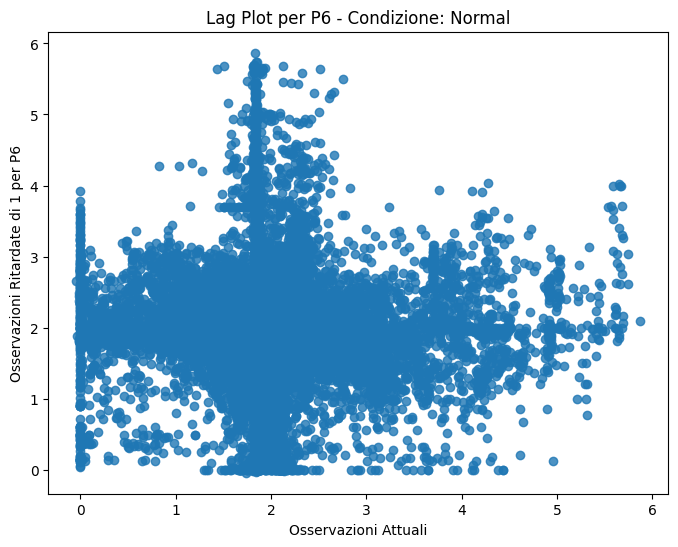

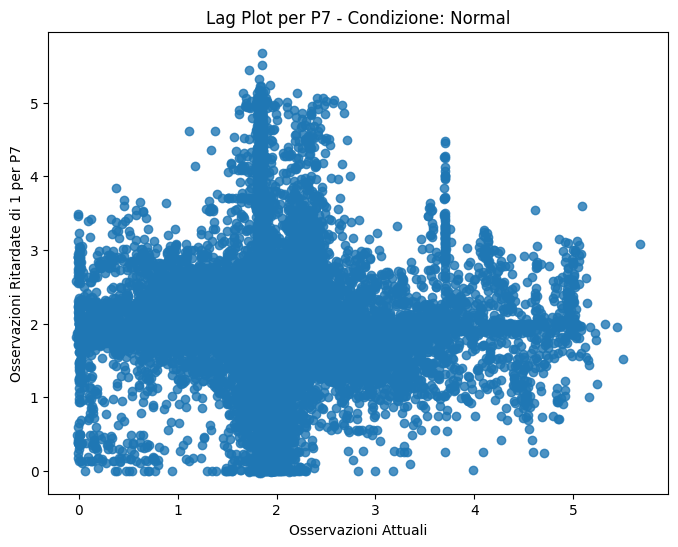

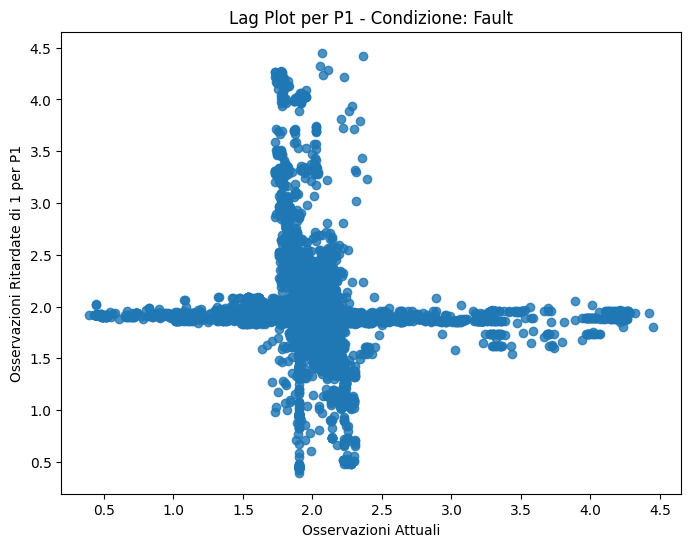

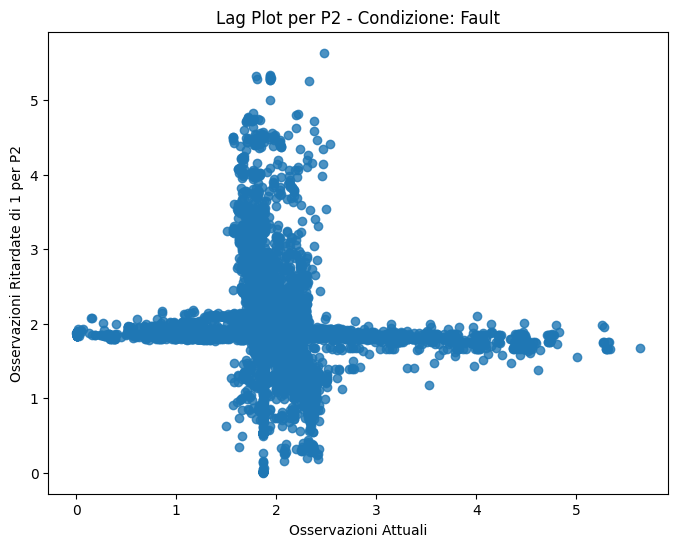

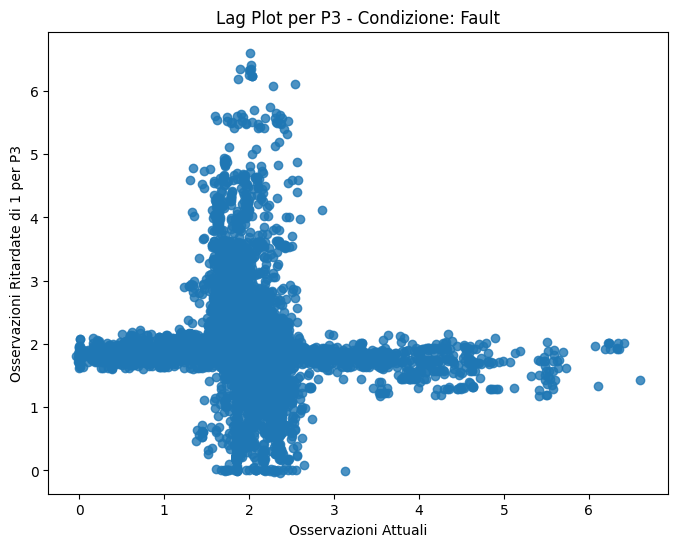

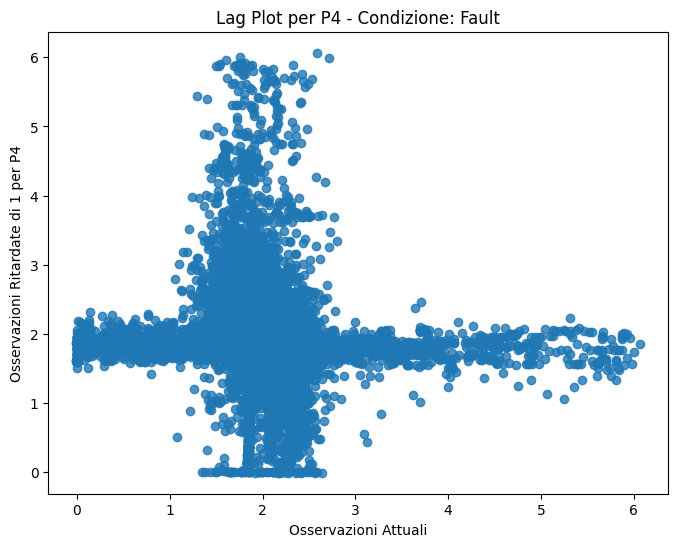

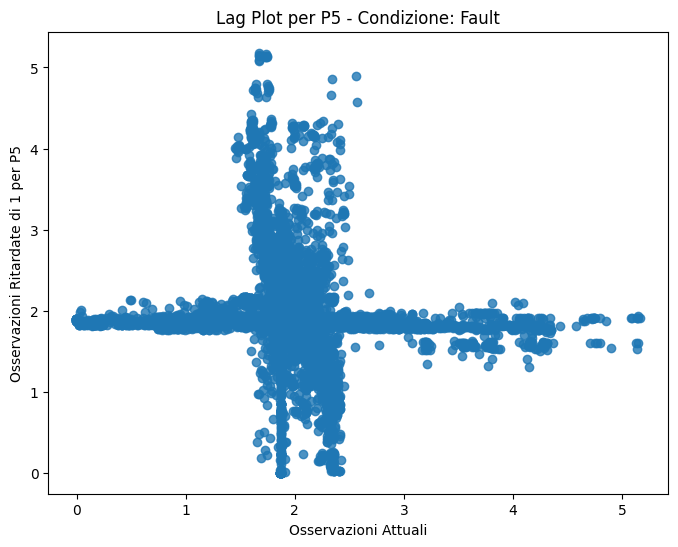

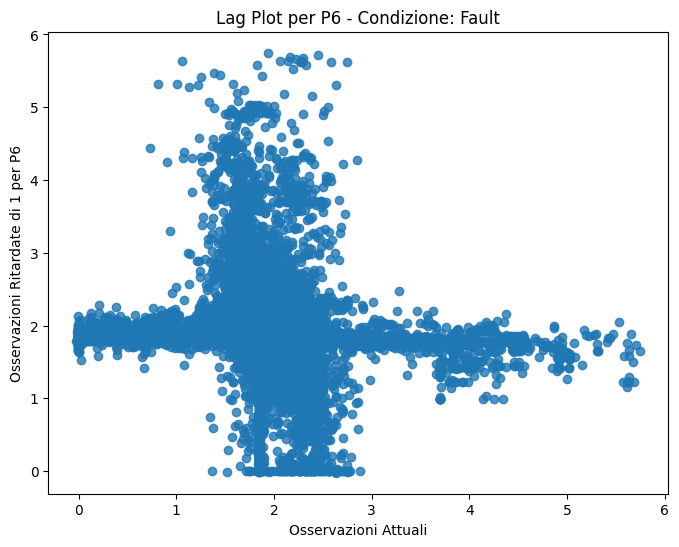

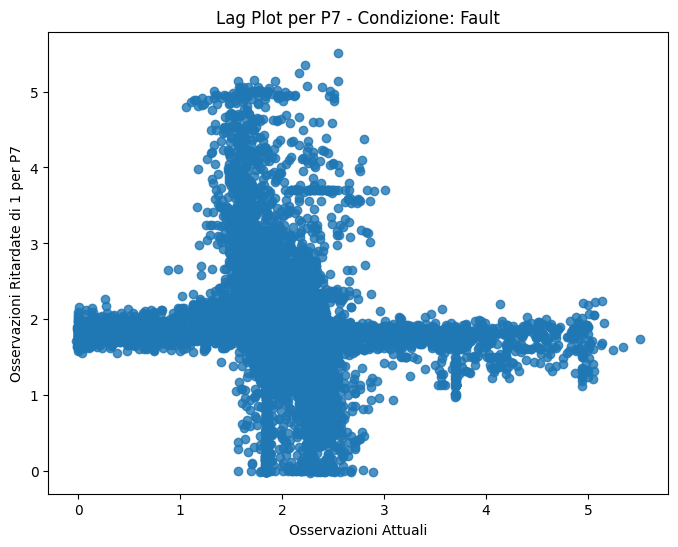

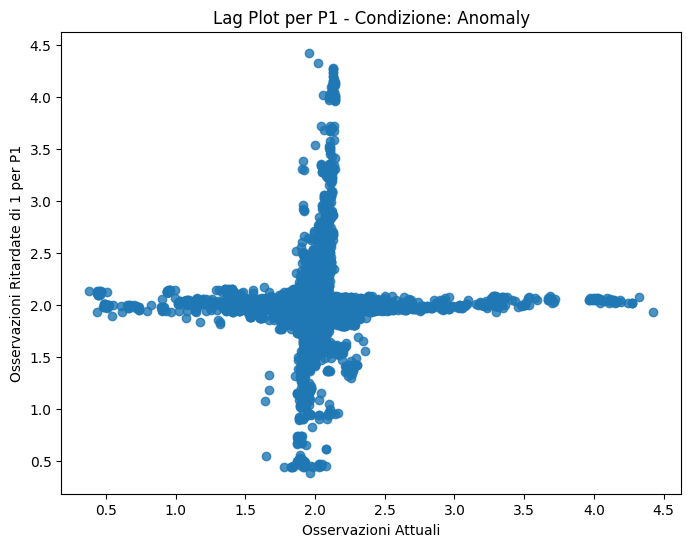

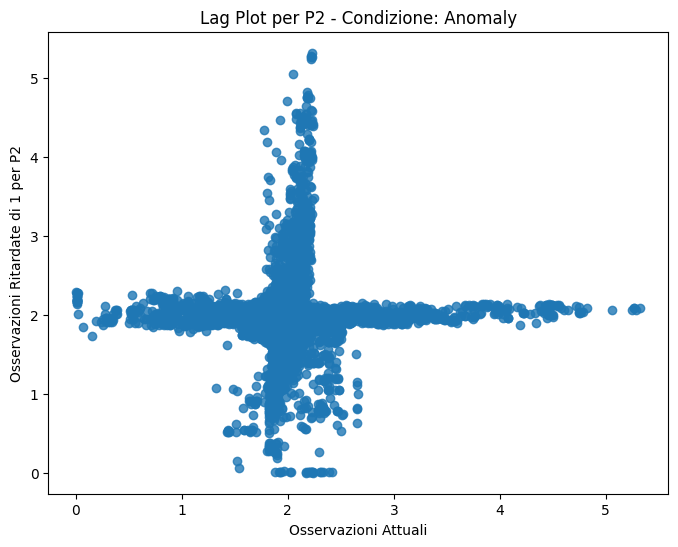

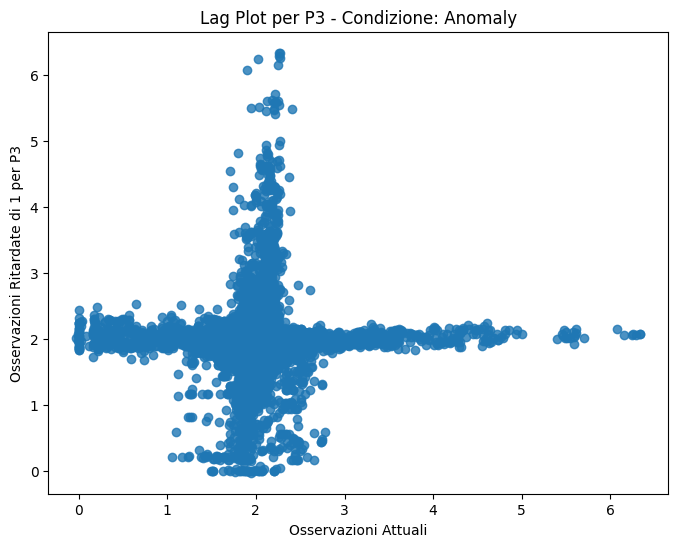

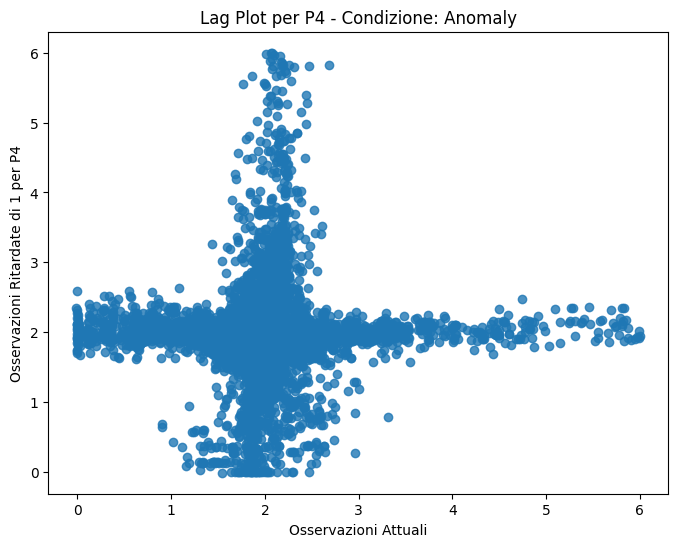

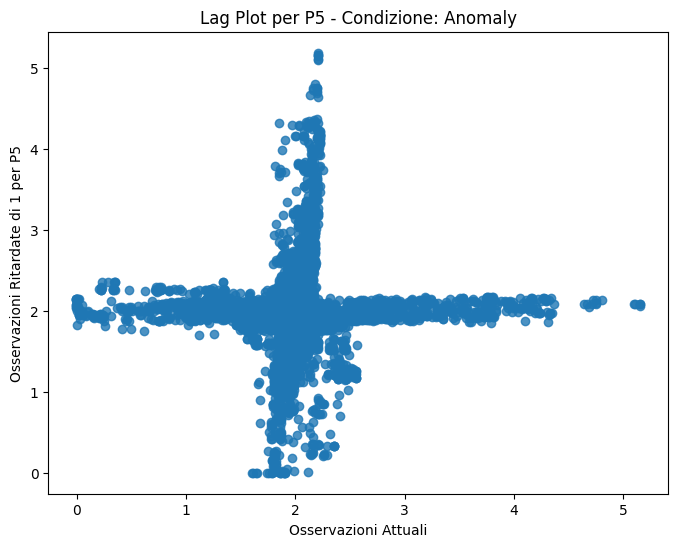

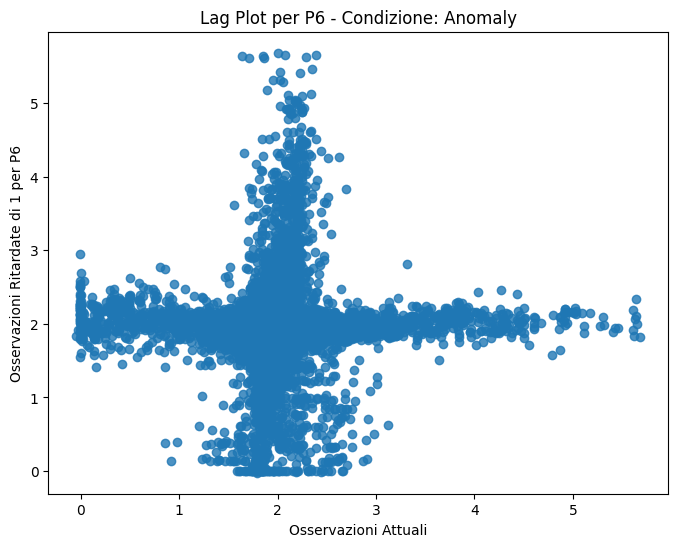

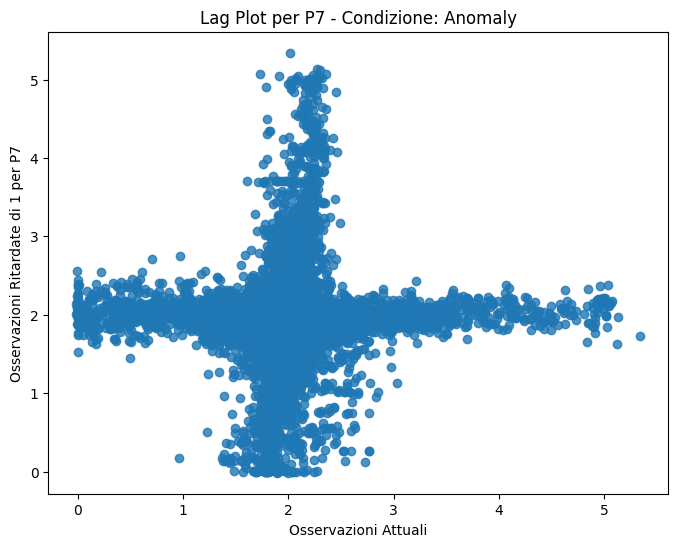

In [55]:
num_sensors = 7  # Dal tuo commento sembra che tu abbia i sensori P1-P7

# Liste delle condizioni uniche nel DataFrame
conditions = df_spacecraft1['Condition'].unique()

# Creazione di lag plot per ciascuna condizione e ciascun sensore di pressione
for condition in conditions:
    df_condition = df_spacecraft1[df_spacecraft1['Condition'] == condition]

    for sensor in range(1, num_sensors + 1):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_condition[f'P{sensor}'], df_condition[f'P{sensor}'].shift(80), alpha=0.8)
        plt.title(f'Lag Plot per P{sensor} - Condizione: {condition}')
        plt.xlabel('Osservazioni Attuali')
        plt.ylabel(f'Osservazioni Ritardate di 1 per P{sensor}')
        plt.show()